In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium


#For Time Series 
from datetime import datetime as dt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018_2023_V1.csv')
df.head()

CRASH DATE TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2018-01-01 00:00:00    QUEENS     11419  40.68297  -73.82824   
1  2018-01-01 00:00:00  BROOKLYN     11239  40.65306  -73.88202   
2  2018-01-01 00:00:00  BROOKLYN     11230  40.62418  -73.97048   
3  2018-01-01 00:00:00  BROOKLYN     11234  40.62877  -73.91825   
4  2018-01-01 00:00:00  BROOKLYN     11230  40.62322  -73.96102   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          1                         0   
4                          0                         0   

    CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0             Passing Too Closely       3819067   
1  Driver Inattention/Distraction       3820851   
2  Driver Inattention/Distraction       3822296   
3   Failure to Yield Right-of-Way       3820945   
4  Driver Inattention/Distraction       3821055   

                   VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0                                Sedan         Moving Violation  Winter   
1                                Sedan             Driver Error  Winter   
2  Station Wagon/Sport Utility Vehicle             Driver Error  Winter   
3                                Sedan         Moving Violation  Winter   
4                                 Taxi             Driver Error  Winter   

  TIME OF DAY  IS RUSH HOUR  
0  Late Night         False  
1  Late Night         False  
2  Late Night         False  
3  Late Night         False  
4  Late Night         False

In [3]:
df_2023 = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2023_V1.csv')
df_2023

CRASH DATE TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0     2023-01-01 00:00:00    QUEENS     11101  40.745068 -73.936356   
1     2023-01-01 00:34:00    QUEENS     11435  40.713543 -73.812640   
2     2023-01-01 00:35:00  BROOKLYN     11229  40.601310 -73.954720   
3     2023-01-01 01:10:00  BROOKLYN     11223  40.593760 -73.982740   
4     2023-01-01 01:17:00    QUEENS     11375  40.724308 -73.842575   
...                   ...       ...       ...        ...        ...   
6146  2023-03-27 20:44:00  BROOKLYN     11238  40.670660 -73.957985   
6147  2023-03-27 21:50:00    QUEENS     11385  40.709038 -73.898460   
6148  2023-03-27 22:10:00  BROOKLYN     11218  40.640410 -73.969124   
6149  2023-03-27 23:07:00  BROOKLYN     11218  40.640316 -73.979070   
6150  2023-03-27 23:46:00  BROOKLYN     11211  40.713800 -73.933190   

      NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                             0                         0   
1                             1                         0   
2                             0                         0   
3                             2                         0   
4                             0                         0   
...                         ...                       ...   
6146                          1                         0   
6147                          1                         0   
6148                          1                         0   
6149                          0                         0   
6150                          4                         0   

       CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0     Driver Inattention/Distraction       4599239   
1                Alcohol Involvement       4594890   
2                   Backing Unsafely       4594332   
3                       Unsafe Speed       4594435   
4                Alcohol Involvement       4595209   
...                              ...           ...   
6146  Driver Inattention/Distraction       4616538   
6147   Failure to Yield Right-of-Way       4616419   
6148  Driver Inattention/Distraction       4616379   
6149                Backing Unsafely       4616380   
6150  Driver Inattention/Distraction       4616089   

                      VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0     Station Wagon/Sport Utility Vehicle             Driver Error  Winter   
1                                   Sedan        Bodily Impairment  Winter   
2     Station Wagon/Sport Utility Vehicle         Moving Violation  Winter   
3     Station Wagon/Sport Utility Vehicle         Moving Violation  Winter   
4                                   Sedan        Bodily Impairment  Winter   
...                                   ...                      ...     ...   
6146  Station Wagon/Sport Utility Vehicle             Driver Error  Spring   
6147                                Moped         Moving Violation  Spring   
6148                                Sedan             Driver Error  Spring   
6149                            Box Truck         Moving Violation  Spring   
6150                                Sedan             Driver Error  Spring   

     TIME OF DAY  IS RUSH HOUR  
0     Late Night         False  
1     Late Night         False  
2     Late Night         False  
3     Late Night         False  
4     Late Night         False  
...          ...           ...  
6146       Night         False  
6147       Night         False  
6148       Night         False  
6149       Night         False  
6150       Night         False  

[6151 rows x 14 columns]

#### Changing DateTime Index

In [4]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])
df_2023['CRASH DATE TIME'] = pd.to_datetime(df_2023['CRASH DATE TIME'])

In [5]:
ts = df.copy()
ts_2023 = df_2023.copy()
ts.head()

CRASH DATE TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0      2018-01-01    QUEENS     11419  40.68297  -73.82824   
1      2018-01-01  BROOKLYN     11239  40.65306  -73.88202   
2      2018-01-01  BROOKLYN     11230  40.62418  -73.97048   
3      2018-01-01  BROOKLYN     11234  40.62877  -73.91825   
4      2018-01-01  BROOKLYN     11230  40.62322  -73.96102   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          1                         0   
4                          0                         0   

    CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0             Passing Too Closely       3819067   
1  Driver Inattention/Distraction       3820851   
2  Driver Inattention/Distraction       3822296   
3   Failure to Yield Right-of-Way       3820945   
4  Driver Inattention/Distraction       3821055   

                   VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0                                Sedan         Moving Violation  Winter   
1                                Sedan             Driver Error  Winter   
2  Station Wagon/Sport Utility Vehicle             Driver Error  Winter   
3                                Sedan         Moving Violation  Winter   
4                                 Taxi             Driver Error  Winter   

  TIME OF DAY  IS RUSH HOUR  
0  Late Night         False  
1  Late Night         False  
2  Late Night         False  
3  Late Night         False  
4  Late Night         False

### Groupby Daily

In [6]:
#Group the values by day and count the number of instances of each value
daily_count = ts.groupby([ts['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')
daily2023_count = ts_2023.groupby([ts['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Print the result
print(daily_count)

      CRASH DATE TIME CONTRIBUTING CATEGORY V1  count
0          2018-01-01        Bodily Impairment      4
1          2018-01-01             Driver Error     45
2          2018-01-01    Environmental Factors      2
3          2018-01-01         Moving Violation     72
4          2018-01-01       Other Distractions      2
...               ...                      ...    ...
12954      2022-12-31        Bodily Impairment      6
12955      2022-12-31             Driver Error     29
12956      2022-12-31    Environmental Factors      4
12957      2022-12-31         Moving Violation     34
12958      2022-12-31  Third-Party (Vehicular)      2

[12959 rows x 3 columns]


In [7]:
#Create pivot table of daily cause categories
ts_pivt = daily_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
ts2023_pivt = daily2023_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)


ts_pivt.head(10)

CONTRIBUTING CATEGORY V1  Bodily Impairment  Driver Error  \
CRASH DATE TIME                                             
2018-01-01                              4.0          45.0   
2018-01-02                              1.0          73.0   
2018-01-03                              3.0          86.0   
2018-01-04                              4.0          25.0   
2018-01-05                              2.0          53.0   
2018-01-06                              3.0          44.0   
2018-01-07                              4.0          32.0   
2018-01-08                              2.0          77.0   
2018-01-09                              4.0          60.0   
2018-01-10                              3.0          66.0   

CONTRIBUTING CATEGORY V1  Environmental Factors  Internal Electronics Usage  \
CRASH DATE TIME                                                               
2018-01-01                                  2.0                         0.0   
2018-01-02                                  8.0                         0.0   
2018-01-03                                  2.0                         1.0   
2018-01-04                                  2.0                         0.0   
2018-01-05                                  4.0                         0.0   
2018-01-06                                  2.0                         0.0   
2018-01-07                                  3.0                         0.0   
2018-01-08                                  4.0                         0.0   
2018-01-09                                  4.0                         0.0   
2018-01-10                                  4.0                         2.0   

CONTRIBUTING CATEGORY V1  Moving Violation  Other Distractions  \
CRASH DATE TIME                                                  
2018-01-01                            72.0                 2.0   
2018-01-02                            83.0                 3.0   
2018-01-03                           105.0                 1.0   
2018-01-04                            43.0                 0.0   
2018-01-05                           114.0                 0.0   
2018-01-06                            75.0                 1.0   
2018-01-07                            66.0                 1.0   
2018-01-08                           115.0                 0.0   
2018-01-09                           105.0                 1.0   
2018-01-10                           135.0                 0.0   

CONTRIBUTING CATEGORY V1  Road Conditions  Third-Party (Non-Vehicular)  \
CRASH DATE TIME                                                          
2018-01-01                            5.0                          0.0   
2018-01-02                            3.0                          2.0   
2018-01-03                            0.0                          3.0   
2018-01-04                           46.0                          0.0   
2018-01-05                           45.0                          0.0   
2018-01-06                           22.0                          1.0   
2018-01-07                           10.0                          1.0   
2018-01-08                            7.0                          0.0   
2018-01-09                            6.0                          2.0   
2018-01-10                            7.0                          0.0   

CONTRIBUTING CATEGORY V1  Third-Party (Vehicular)  Vehicle Defects  
CRASH DATE TIME                                                     
2018-01-01                                    5.0              1.0  
2018-01-02                                    9.0              6.0  
2018-01-03                                    8.0              1.0  
2018-01-04                                    4.0              3.0  
2018-01-05                                    7.0              2.0  
2018-01-06                                    4.0              3.0  
2018-01-07                                    4.0              2.0  
2018-01-08     

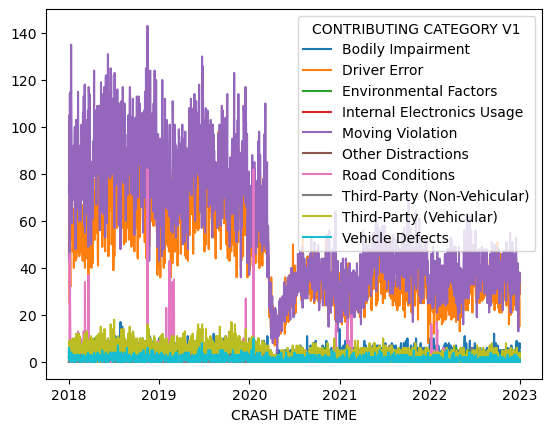

In [8]:
ts_pivt.plot();

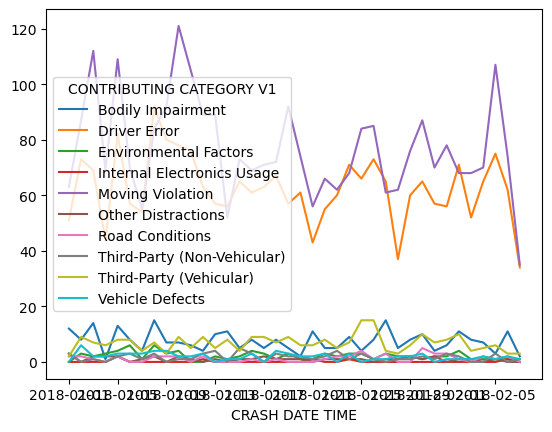

In [9]:
ts2023_pivt.plot();

In [10]:
#Converting the index as datetime index
ts_pivt.index = pd.to_datetime(ts_pivt.index)
ts2023_pivt.index = pd.to_datetime(ts2023_pivt.index)

In [11]:
#Select highest causes of collision
ts_mv = ts_pivt[['Moving Violation']]
ts_mv

CONTRIBUTING CATEGORY V1  Moving Violation
CRASH DATE TIME                           
2018-01-01                            72.0
2018-01-02                            83.0
2018-01-03                           105.0
2018-01-04                            43.0
2018-01-05                           114.0
...                                    ...
2022-12-27                            27.0
2022-12-28                            31.0
2022-12-29                            29.0
2022-12-30                            38.0
2022-12-31                            34.0

[1826 rows x 1 columns]

In [12]:
#
ts2023_mv = ts2023_pivt[['Moving Violation']]
ts2023_mv

CONTRIBUTING CATEGORY V1  Moving Violation
CRASH DATE TIME                           
2018-01-01                            63.0
2018-01-02                            87.0
2018-01-03                           112.0
2018-01-04                            69.0
2018-01-05                           109.0
2018-01-06                            70.0
2018-01-07                            55.0
2018-01-08                            84.0
2018-01-09                            92.0
2018-01-10                           121.0
2018-01-11                           105.0
2018-01-12                            89.0
2018-01-13                            89.0
2018-01-14                            52.0
2018-01-15                            73.0
2018-01-16                            69.0
2018-01-17                            71.0
2018-01-18                            72.0
2018-01-19                            92.0
2018-01-20                            74.0
2018-01-21                            56.0
2018-01-22                            66.0
2018-01-23                            62.0
2018-01-24                            68.0
2018-01-25                            84.0
2018-01-26                            85.0
2018-01-27                            61.0
2018-01-28                            62.0
2018-01-29                            76.0
2018-01-30                            87.0
2018-01-31                            70.0
2018-02-01                            78.0
2018-02-02                            68.0
2018-02-03                            68.0
2018-02-04                            70.0
2018-02-05                           107.0
2018-02-06                            74.0
2018-02-07                            35.0

## Stationarity
Before we can begin modeling, we must check the stationarity of the dataset. A stationary dataset is required for Time Series models to perform well and accurately. The Dickey-Fuller statistical test will be utilized to verify stationarity.

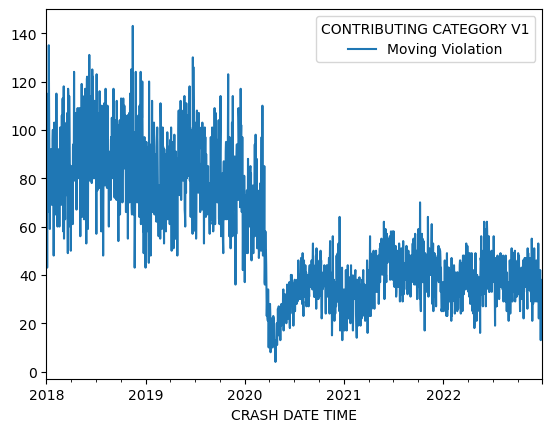

In [13]:
ts_mv.plot();

In [14]:
from statsmodels.tsa.stattools import adfuller

vtest = adfuller(ts_mv)
vtest

(-1.3876394246285637,
 0.5881873790782021,
 22,
 1803,
 {'1%': -3.4339820768018106,
  '5%': -2.8631443597478143,
  '10%': -2.567624108684946},
 13801.901759773966)

In [15]:
p_val = adfuller(ts_mv)[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" therefore we can safely assume that the data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that the data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.5881873790782021,
 therefore we cannot reject the null hypothesis that the data is not stationary.


## Decomposition

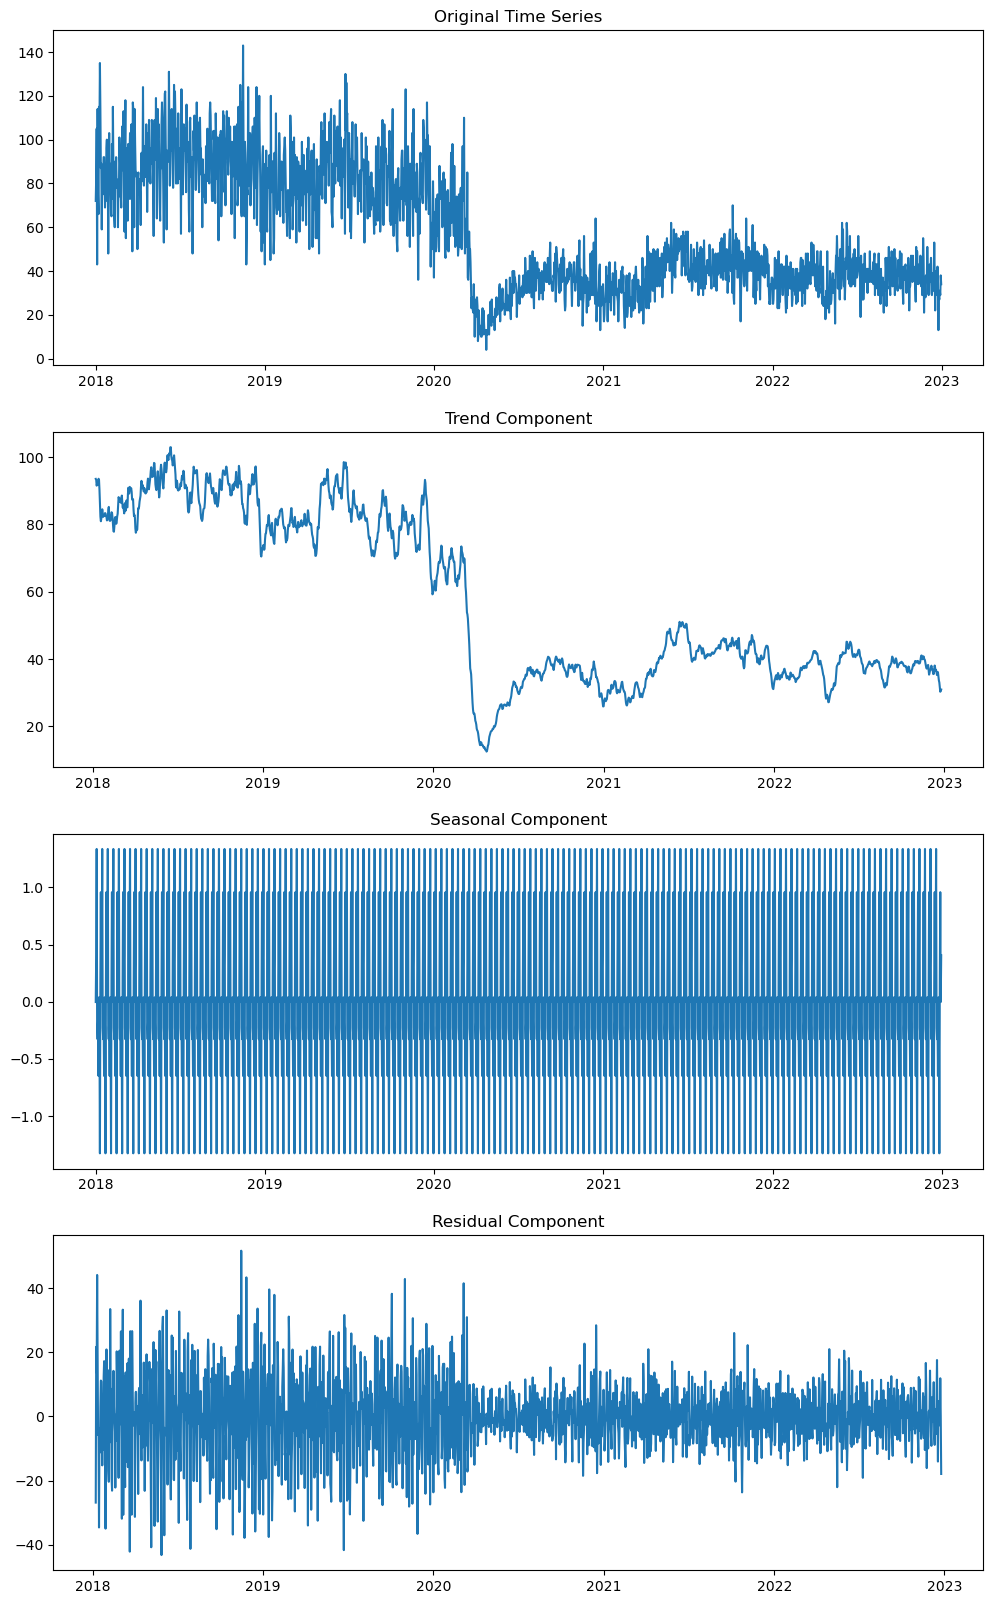

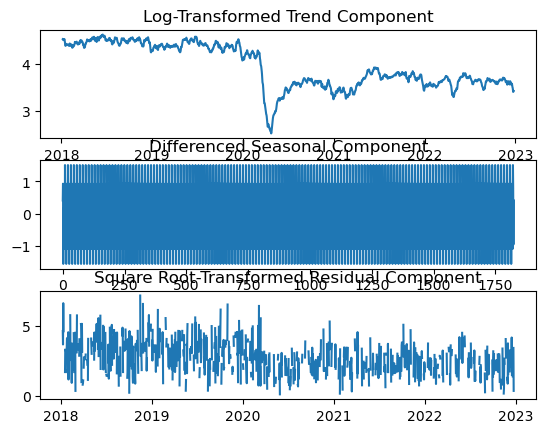

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose


fig = plt.figure(figsize=(12, 20))

# Apply decomposition to separate the time series into trend, seasonal, and residual components
decomp = seasonal_decompose(ts_mv['Moving Violation'], model='additive', period=12) # Change period according to seasonality

# Plot the original time series and the decomposed components
plt.subplot(4, 1, 1)
plt.plot(ts_mv['Moving Violation'])
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(decomp.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomp.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomp.resid)
plt.title('Residual Component')

# Apply different transformations to each component
trend_transformed = np.log(decomp.trend)
seasonal_transformed = np.diff(decomp.seasonal, n=1)
residual_transformed = np.sqrt(decomp.resid)

# Plot the transformed components
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(trend_transformed)
plt.title('Log-Transformed Trend Component')

plt.subplot(3, 1, 2)
plt.plot(seasonal_transformed)
plt.title('Differenced Seasonal Component')

plt.subplot(3, 1, 3)
plt.plot(residual_transformed)
plt.title('Square Root-Transformed Residual Component')

plt.show()

### Differencing
To make the dataset stationary, we will be differencing the data. 

In [17]:
#Difference the data and drop the NaN values
diff = ts_mv.diff().dropna()

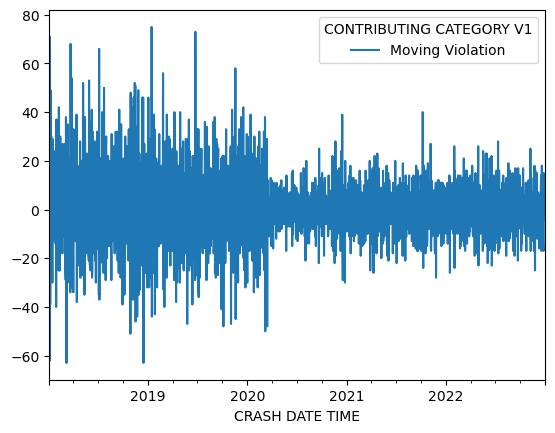

In [18]:
diff.plot();

The first differencing of the data looks to have removed the strong trend within the dataset and looks like it is stationary, however, we will double check the stationarity with the Dickey-Fuller statistical test. 

In [19]:
#Dickey-Fuller test to verify stationarity
difftest = adfuller(diff)
difftest

(-11.71069342873033,
 1.4914792374254622e-21,
 25,
 1799,
 {'1%': -3.433990164137254,
  '5%': -2.8631479299063405,
  '10%': -2.567626009684832},
 13794.653895803922)

In [20]:
#Sanity check to confirm stationarity
diff_pval = adfuller(diff)[1]

print(f"The p-value associated with the Dickey-Fuller statistical test is {diff_pval},")
if diff_pval < 0.05:
    print(" therefore we can safely assume that subtracted rolling mean data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that subtracted rolling mean data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 1.4914792374254622e-21,
 therefore we can safely assume that subtracted rolling mean data is stationary.


## Train Test Split

In [21]:
# find the index which allows us to split off 20% of the data
cutoff = round(ts_mv.shape[0]*0.8) #cut off point at 80% of the data
cutoff

1461

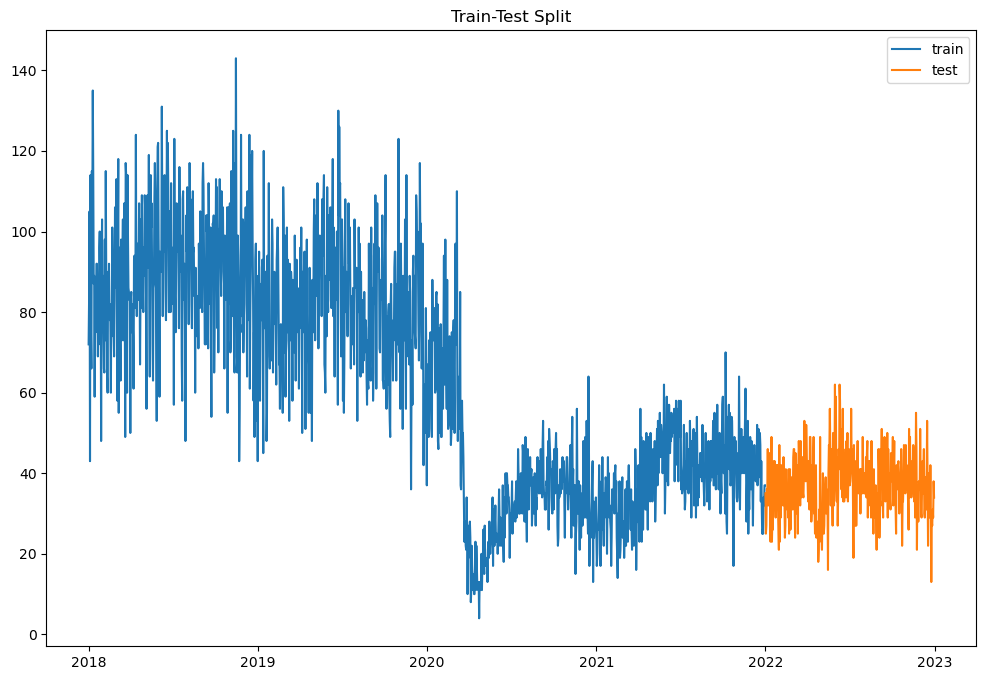

In [22]:
# Define train and test sets according to the index found above
train = ts_mv[:cutoff] #before cut off is train set -- 80%

test = ts_mv[cutoff:] #after cut off is the test set --20%

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

Source: https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

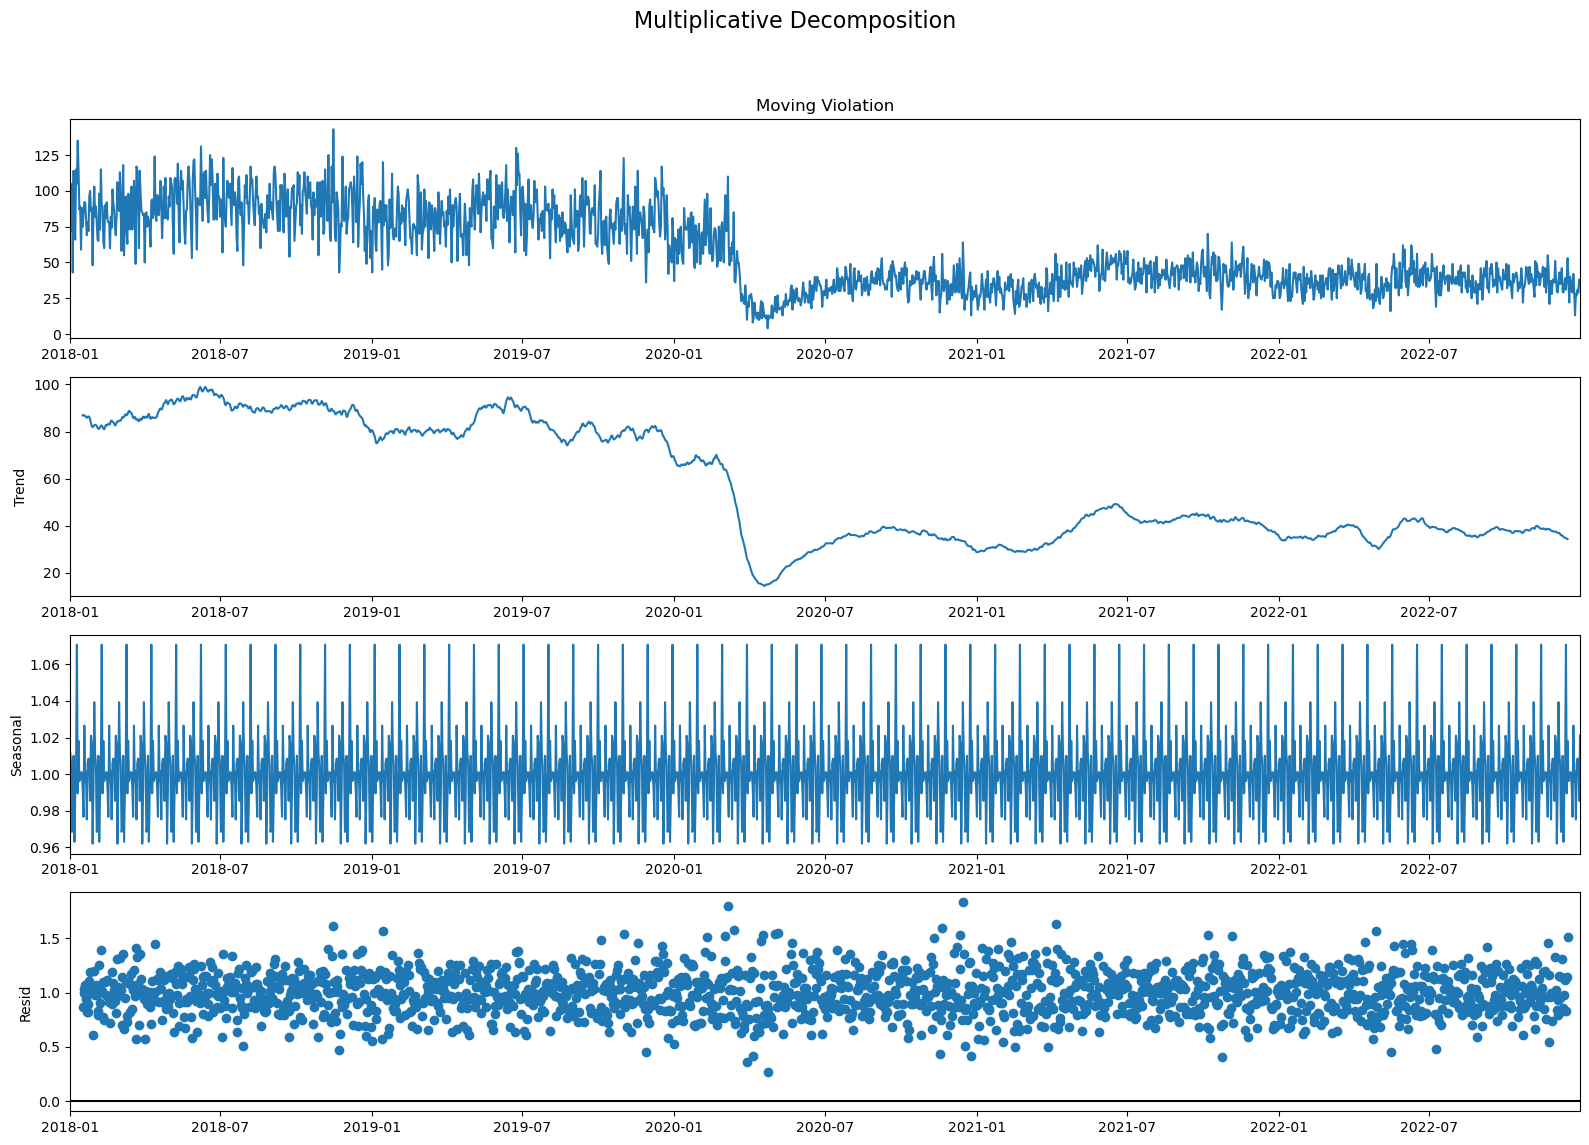

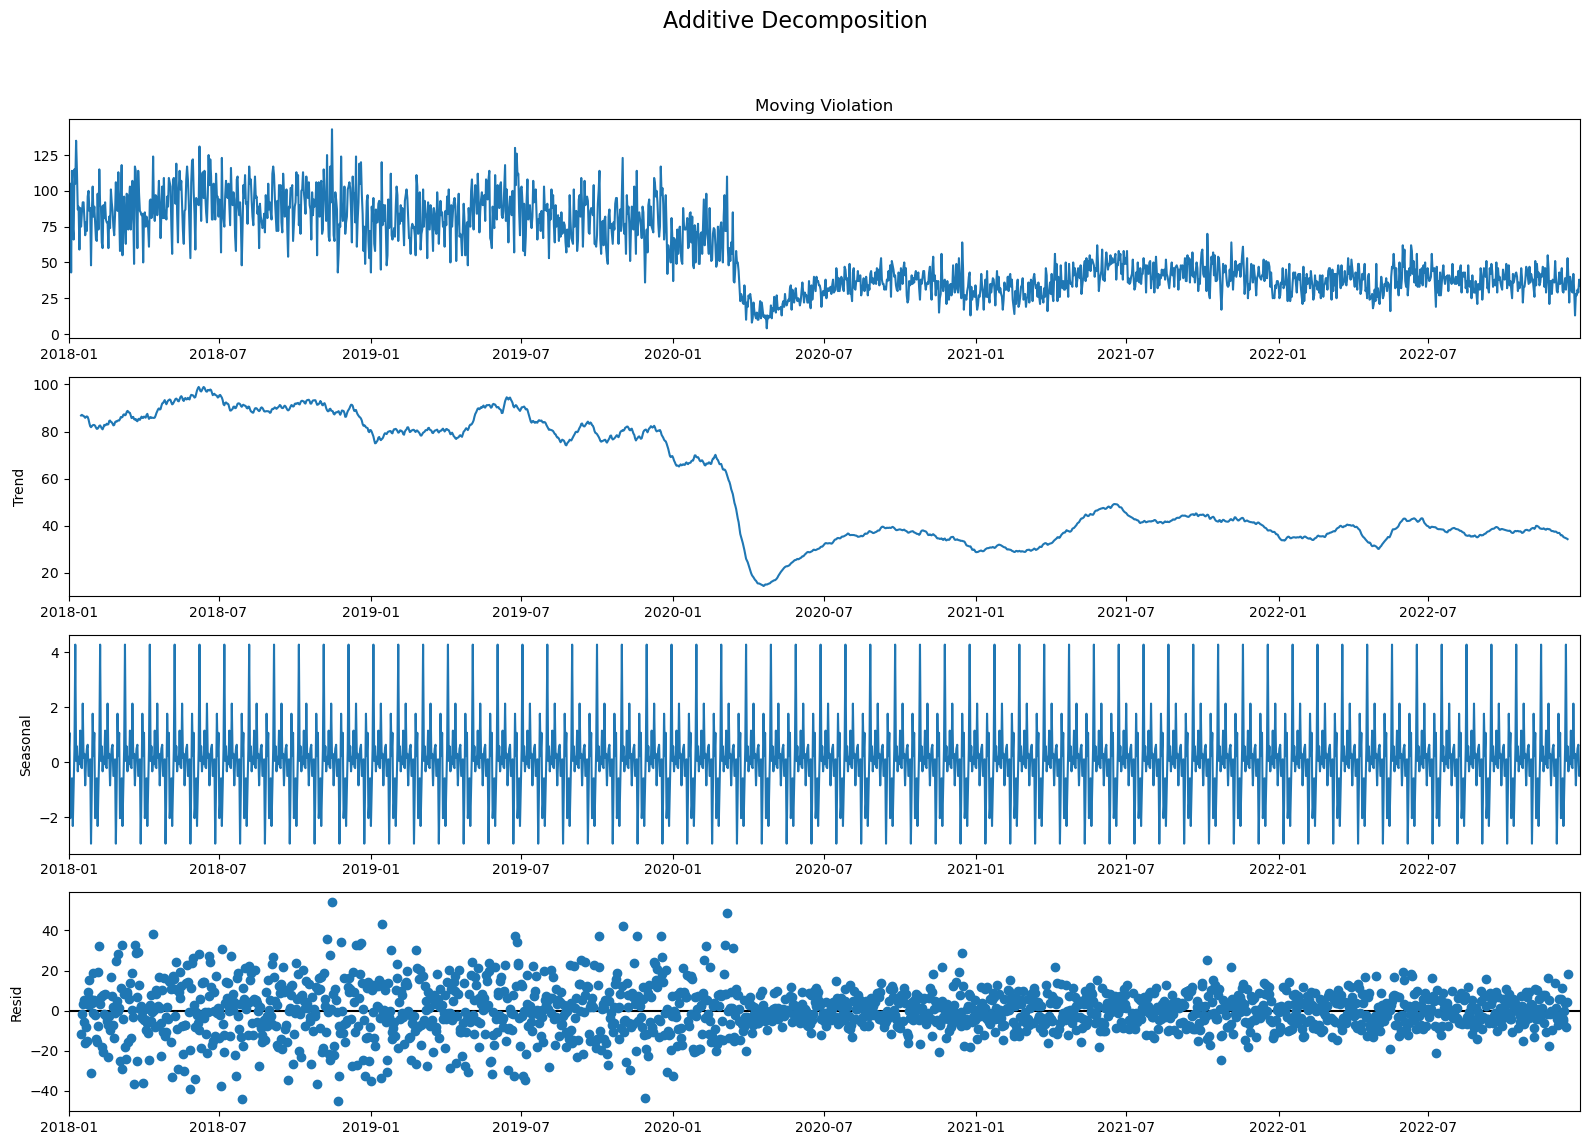

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(ts_mv['Moving Violation'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(ts_mv['Moving Violation'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Baseline Model
The baseline model is a naive model, which is just one shift in time by one period in time and in this case, it would be by 1 week. The metric that will be used to determine the quality and effectiveness of the model will be Root Mean Squared Error (RMSE). 

In [24]:
#
baseline = train.copy()
baseline['One Shift'] = train.shift(1)
baseline

CONTRIBUTING CATEGORY V1  Moving Violation  One Shift
CRASH DATE TIME                                      
2018-01-01                            72.0        NaN
2018-01-02                            83.0       72.0
2018-01-03                           105.0       83.0
2018-01-04                            43.0      105.0
2018-01-05                           114.0       43.0
...                                    ...        ...
2021-12-27                            25.0       26.0
2021-12-28                            34.0       25.0
2021-12-29                            32.0       34.0
2021-12-30                            37.0       32.0
2021-12-31                            37.0       37.0

[1461 rows x 2 columns]

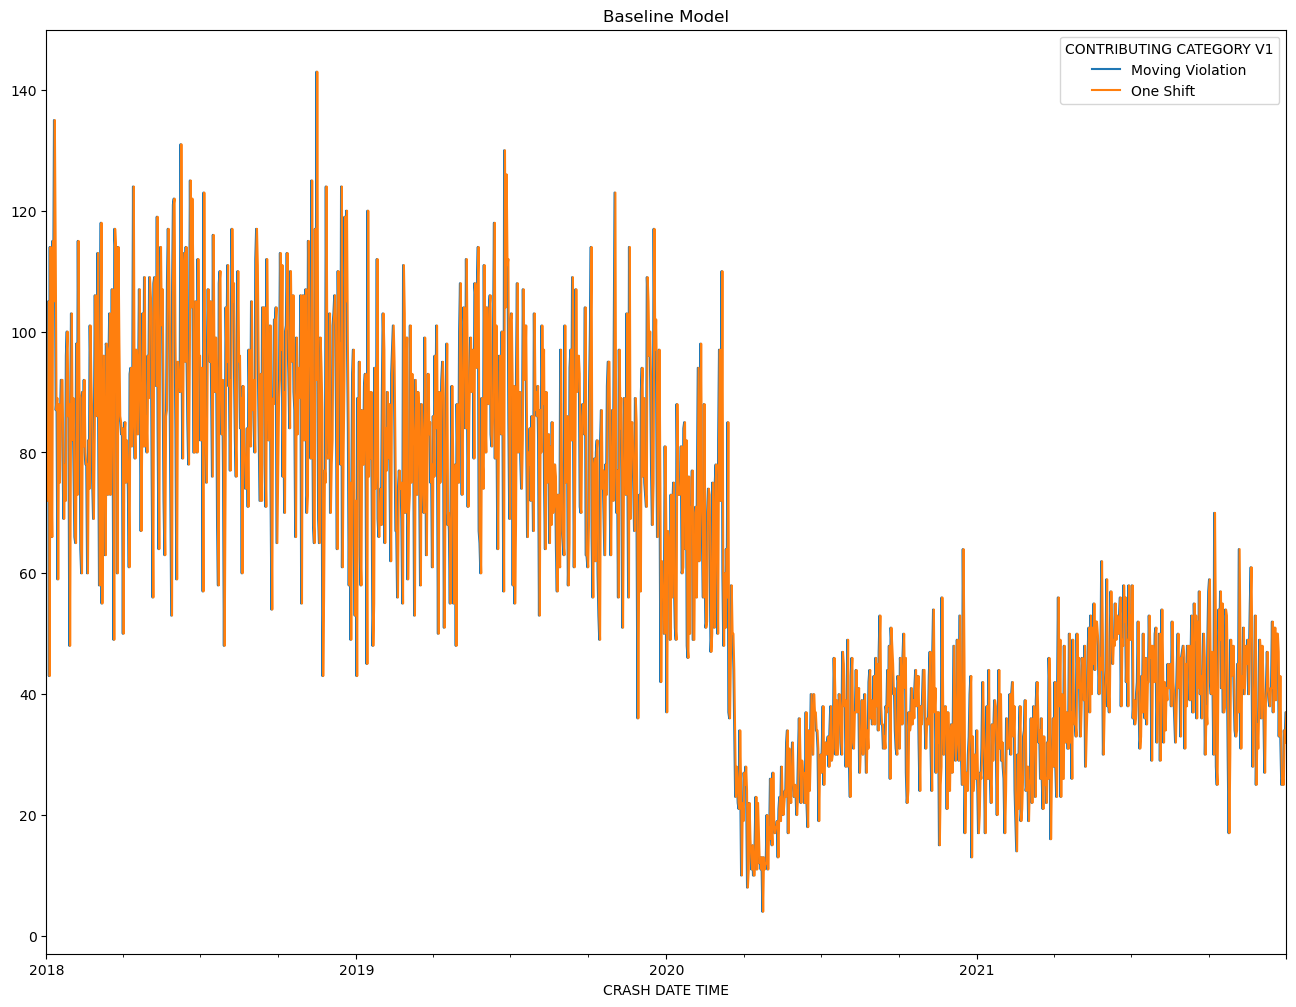

In [25]:
#
baseline.plot()
plt.title('Baseline Model');

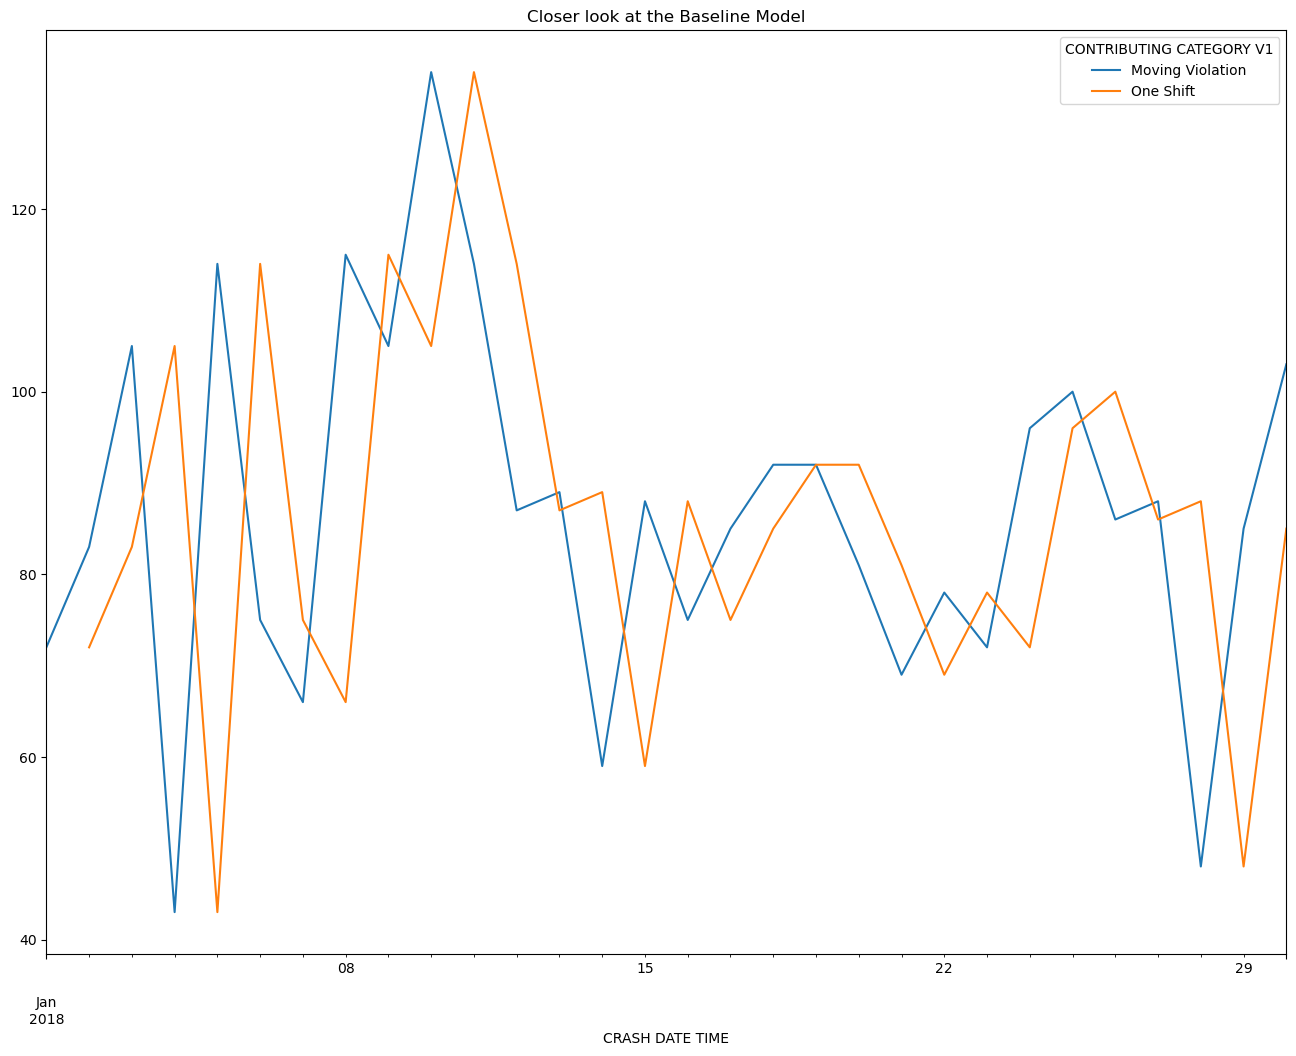

In [26]:
#A closer look
baseline[0:30].plot()
plt.title('Closer look at the Baseline Model');

In [27]:
#Calculate the Root Mean Square Error of the baseline model
baseline_rmse = np.sqrt(mean_squared_error(baseline['Moving Violation'][1:], baseline['One Shift'].dropna()))

print(f'Baseline Model RMSE: {baseline_rmse}')

Baseline Model RMSE: 17.031095654070004


## First Simple Model - ARIMA

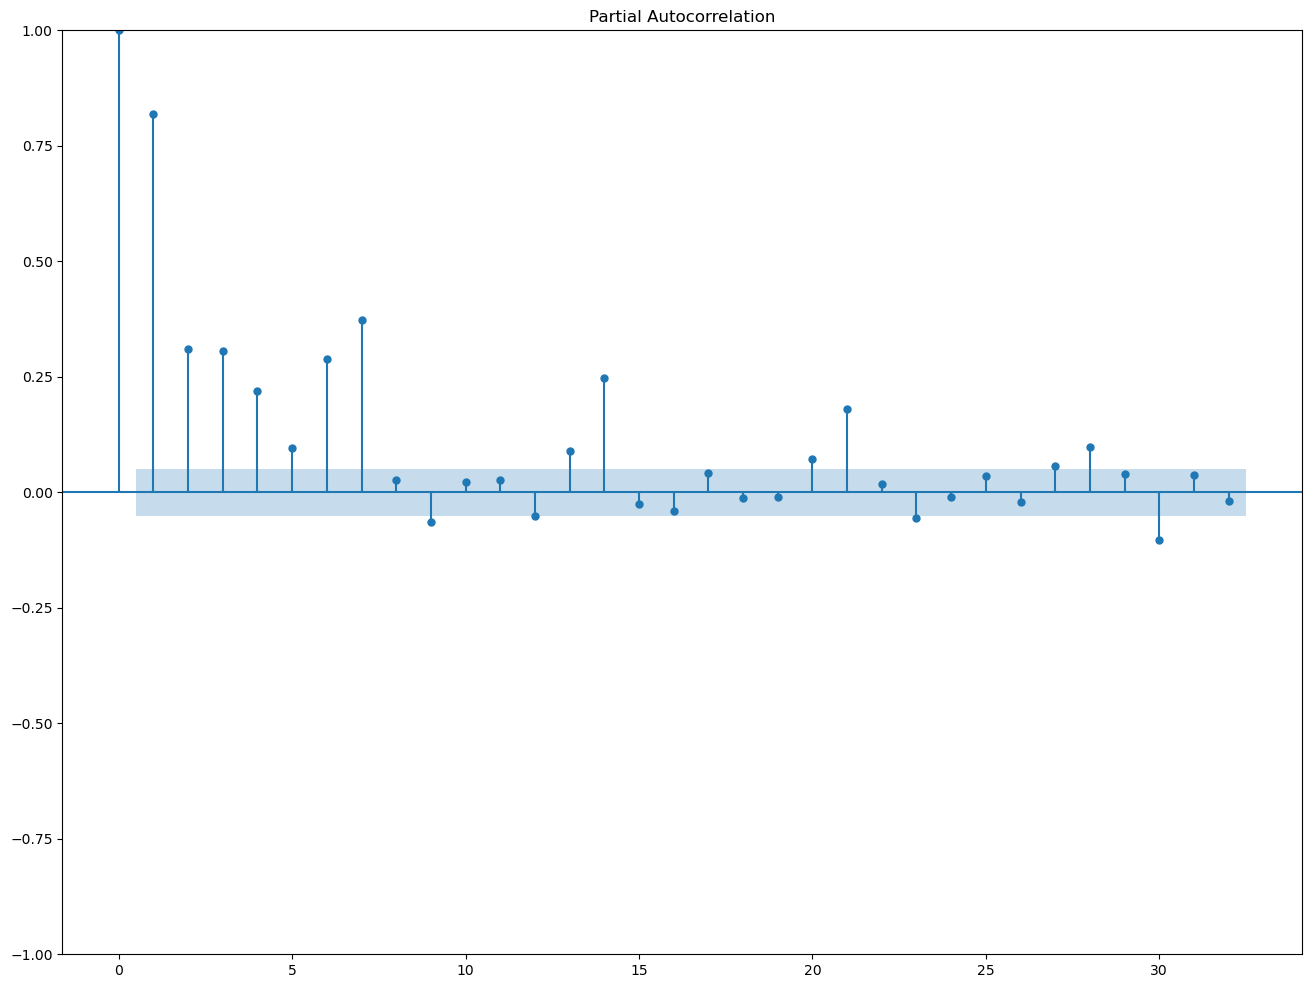

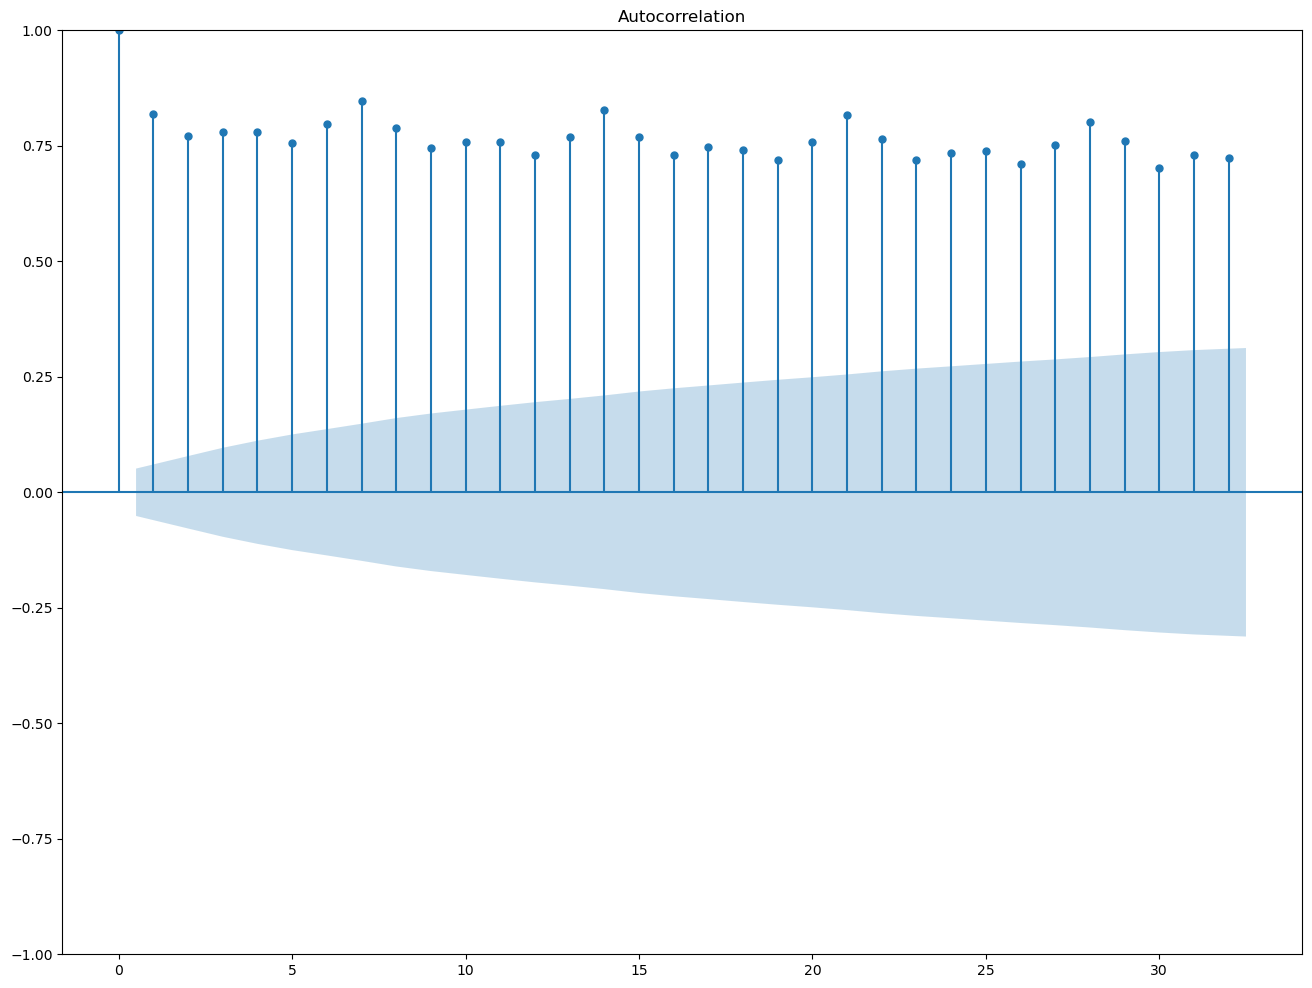

In [28]:
##plot_acf is used to identify the p parameter 
plot_pacf(train)

#Plot_acf is used to identify the q parameter
plot_acf(train);

p = 1 and q = 1

In [29]:
#ARIMA model 
first_model = ARIMA(train['Moving Violation'], order=(1, 1, 1)).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                 1461
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5869.528
Date:                Thu, 13 Apr 2023   AIC                          11745.055
Time:                        22:37:46   BIC                          11760.914
Sample:                    01-01-2018   HQIC                         11750.971
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1459      0.025      5.730      0.000       0.096       0.196
ma.L1         -0.9106      0.012    -75.615      0.000      -0.934      -0.887
sigma2       181.5317      5.539     32.775      0.000     170.676     192.388
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                62.47
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred1 = first_model.predict(typ='levels')

#Calculate the Root Mean Square Error
rmse_model1 = np.sqrt(mean_squared_error(train, train_pred1))

print(f'First Model RMSE: {rmse_model1}')

First Model RMSE: 13.626561736006161


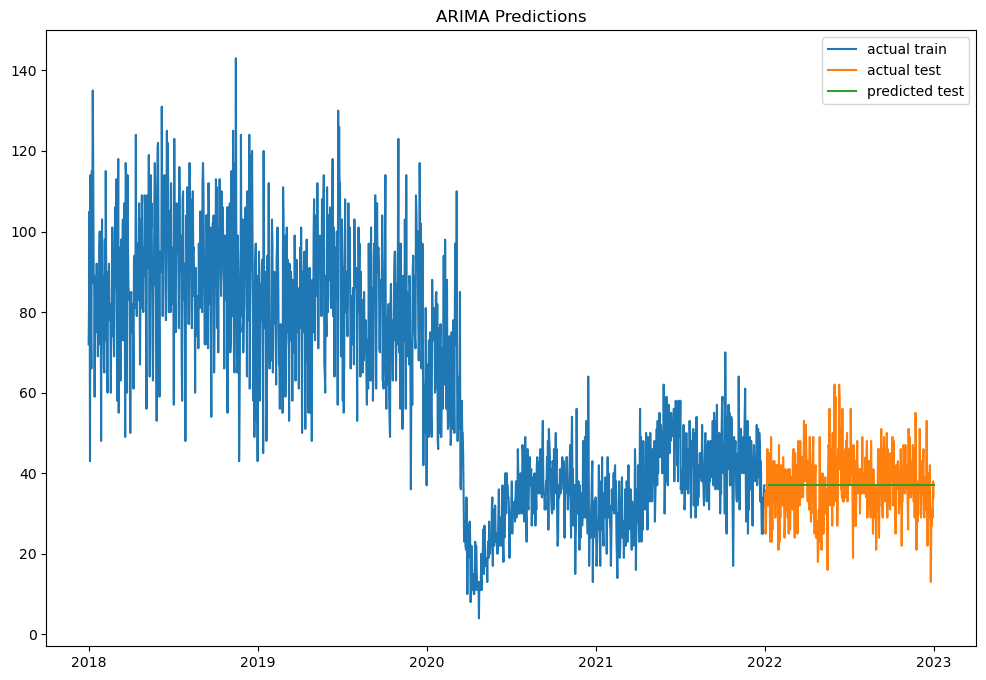

In [31]:
#Generate predictions for the test set
df_pred = first_model.predict(start='2022-01-09', end='2023-01-01')

# plot actual vs. predicted
fig = plt.figure(figsize=(12, 8))
plt.title('ARIMA Predictions')
plt.plot(train, label='actual train')
plt.plot(test, label='actual test')
plt.plot(df_pred, label='predicted test');
plt.legend();

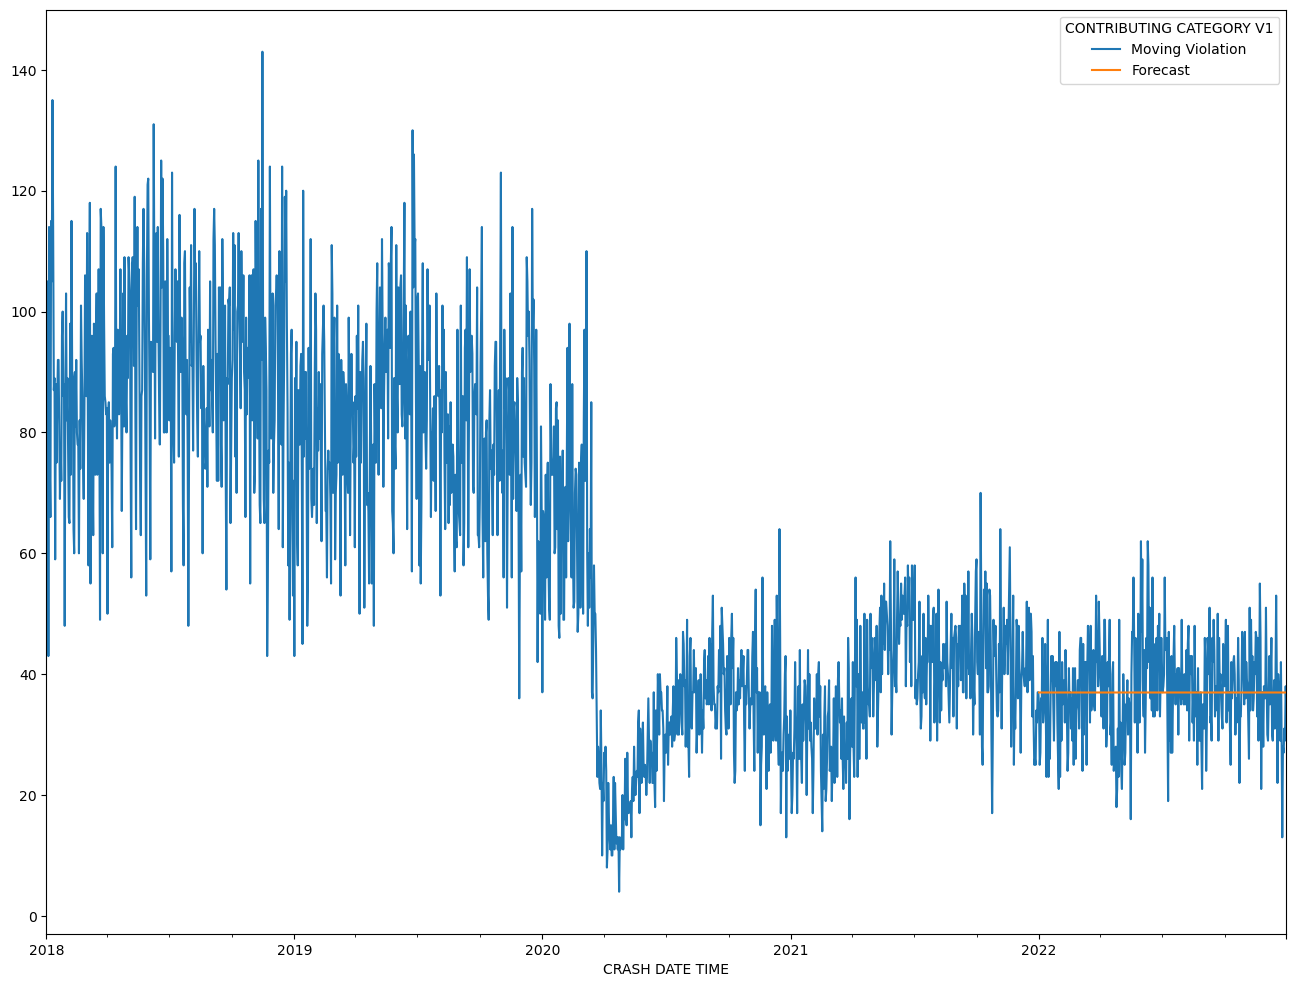

In [32]:
#Forecast future predictions onto the dataset
forecast_test = first_model.forecast(len(test))
ts_mv1=ts_mv.copy()
ts_mv1['Forecast'] = [None]*len(train) + list(forecast_test)

ts_mv1.plot();

Flat lining result confirms that there is seasonality within the data. With the seasonality, it is best to use a SARIMA or SARIMAX model. 

## Second Model - SARIMA using Auto ARIMA
Code Source: https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b

In [33]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [34]:
from itertools import product

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [35]:
params2 = optimize_SARIMA(parameters_list, 1, 1, 4, ts_mv['Moving Violation'])
params2

  0%|          | 0/256 [00:00<?, ?it/s]

(p,q)x(P,Q)           AIC
0    (2, 3, 2, 3)  14069.129048
1    (2, 3, 2, 2)  14185.345797
2    (2, 3, 1, 1)  14187.875790
3    (2, 3, 3, 2)  14188.139629
4    (2, 3, 0, 2)  14200.129232
..            ...           ...
251  (0, 0, 1, 0)  15978.560612
252  (2, 0, 0, 0)  16115.762895
253  (3, 0, 0, 0)  16116.838514
254  (1, 0, 0, 0)  16178.711916
255  (0, 0, 0, 0)  16374.383290

[256 rows x 2 columns]

In [36]:
second_model = SARIMAX(ts_mv['Moving Violation'], order=(2, 1, 3), seasonal_order=(2, 1, 3, 4)).fit(dis=-1)
second_model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08374D+00    |proj g|=  9.22998D-02

At iterate    5    f=  4.04783D+00    |proj g|=  4.01941D-02

At iterate   10    f=  3.96384D+00    |proj g|=  1.61258D-01

At iterate   15    f=  3.93600D+00    |proj g|=  9.40148D-03

At iterate   20    f=  3.93312D+00    |proj g|=  2.07051D-02

At iterate   25    f=  3.92697D+00    |proj g|=  9.25220D-02

At iterate   30    f=  3.91059D+00    |proj g|=  2.70218D-02

At iterate   35    f=  3.88601D+00    |proj g|=  9.53993D-02

At iterate   40    f=  3.86097D+00    |proj g|=  1.18846D-01

At iterate   45    f=  3.85118D+00    |proj g|=  2.35979D-01

At iterate   50    f=  3.84642D+00    |proj g|=  1.69660D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                  Moving Violation   No. Observations:                 1826
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 4)   Log Likelihood               -7023.565
Date:                           Thu, 13 Apr 2023   AIC                          14069.129
Time:                                   22:52:11   BIC                          14129.708
Sample:                               01-01-2018   HQIC                         14091.478
                                    - 12-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4559      0.009    -51.498      0.000      -0.473      -0.439
ar.L2         -0.9636      0.008   -115.357      0.000      -0.980      -0.947
ma.L1         -0.3735      0.016    -23.424      0.000      -0.405      -0.342
ma.L2          0.5054      0.016     31.376      0.000       0.474       0.537
ma.L3         -0.8341      0.015    -54.701      0.000      -0.864      -0.804
ar.S.L4       -1.7969      0.003   -547.830      0.000      -1.803      -1.790
ar.S.L8       -0.9923      0.003   -299.351      0.000      -0.999      -0.986
ma.S.L4        0.7787      0.620      1.257      0.209      -0.436       1.993
ma.S.L8       -0.8185      1.103     -0.742      0.458      -2.980       1.343
ma.S.L12      -0.9599      0.596     -1.611      0.107      -2.128       0.208
sigma2       148.1299     91.417      1.620      0.105     -31.044     327.304
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):               359.68
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

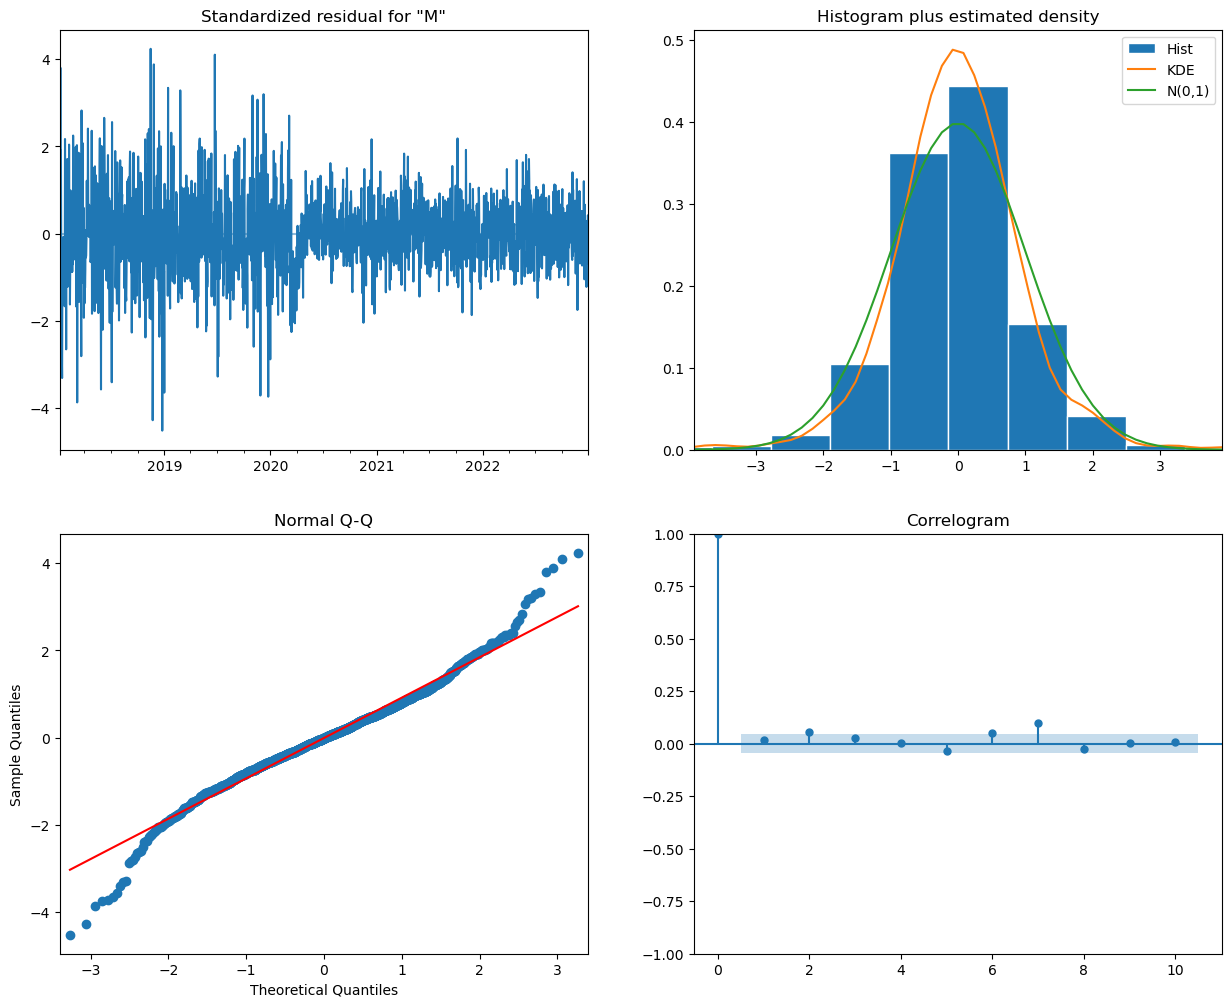

In [37]:
second_model.plot_diagnostics(figsize=(15,12));

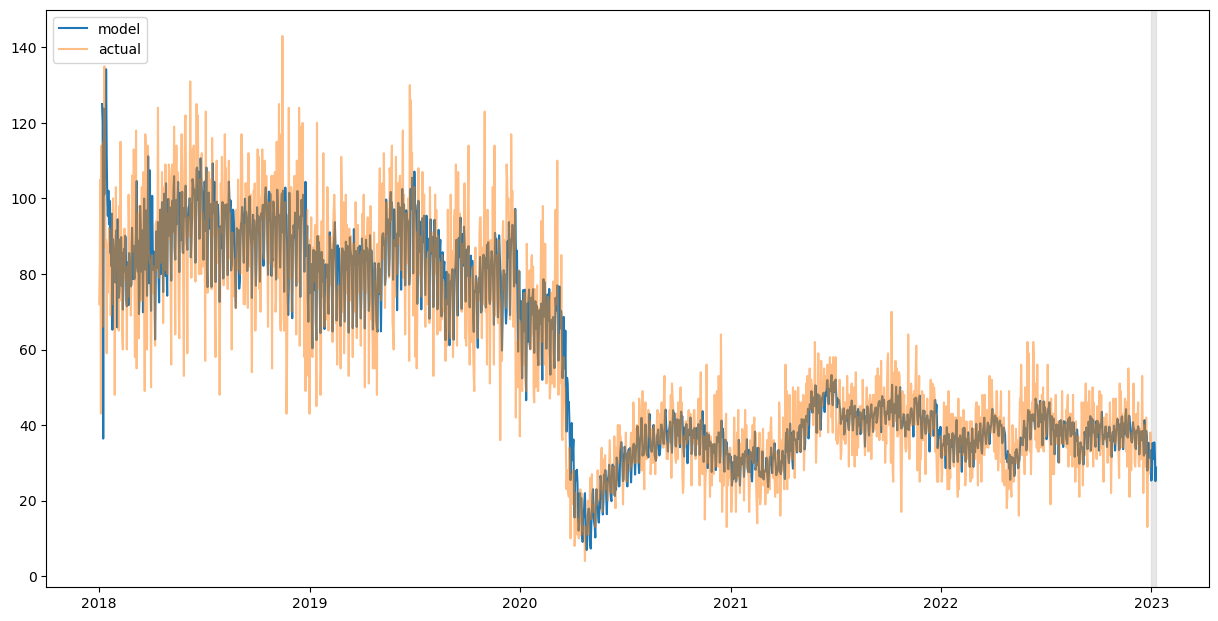

In [38]:
ts_mv['arima_model'] = second_model.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = second_model.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 8)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual', alpha = 0.5)
#plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [39]:
train2_pred = forecast.dropna()
train2_pred = train2_pred[:'2022-01-05']
train2_pred

2018-01-06    124.992553
2018-01-07    120.032116
2018-01-08     36.412254
2018-01-09    123.817836
2018-01-10    101.093300
                 ...    
2022-01-01     32.303496
2022-01-02     31.289269
2022-01-03     34.393566
2022-01-04     34.516519
2022-01-05     35.163592
Length: 1461, dtype: float64

In [40]:
#
rmse_model2 = np.sqrt(mean_squared_error(train, train2_pred))

print(f'Second Model RMSE: {rmse_model2}')

Second Model RMSE: 15.024331942498504


In [41]:
print(f'Baseline Model RMSE: {baseline_rmse}')
print(f'First Model RMSE: {rmse_model1}')
print(f'Second Model RMSE: {rmse_model2}')

Baseline Model RMSE: 17.031095654070004
First Model RMSE: 13.626561736006161
Second Model RMSE: 15.024331942498504


In [42]:
from itertools import product

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


## Third Model

In [43]:
params3 = optimize_SARIMA(parameters_list, 1, 1, 12, ts_mv['Moving Violation'])
params3

  0%|          | 0/256 [00:00<?, ?it/s]

(p,q)x(P,Q)           AIC
0    (2, 3, 3, 3)  14097.404622
1    (3, 3, 0, 3)  14152.280598
2    (3, 3, 3, 1)  14163.959454
3    (3, 3, 2, 1)  14167.589024
4    (2, 3, 2, 1)  14169.576510
..            ...           ...
251  (0, 0, 1, 0)  15961.903641
252  (3, 0, 0, 0)  16020.706689
253  (2, 0, 0, 0)  16121.914224
254  (1, 0, 0, 0)  16483.190315
255  (0, 0, 0, 0)  16689.892650

[256 rows x 2 columns]

In [44]:
model3 = SARIMAX(ts_mv['Moving Violation'], order=(2, 1, 3), seasonal_order=(3, 1, 3, 12)).fit(dis=-1)
model3.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06622D+00    |proj g|=  1.68985D-01


 This problem is unconstrained.



At iterate    5    f=  4.03893D+00    |proj g|=  5.77171D-02

At iterate   10    f=  3.98173D+00    |proj g|=  1.17507D-01

At iterate   15    f=  3.94195D+00    |proj g|=  1.44948D-01

At iterate   20    f=  3.92424D+00    |proj g|=  1.36843D-02

At iterate   25    f=  3.92094D+00    |proj g|=  3.82804D-02

At iterate   30    f=  3.90146D+00    |proj g|=  4.07168D-02

At iterate   35    f=  3.89769D+00    |proj g|=  1.00348D-02

At iterate   40    f=  3.88953D+00    |proj g|=  3.52772D-01

At iterate   45    f=  3.86423D+00    |proj g|=  3.09908D-01

At iterate   50    f=  3.85362D+00    |proj g|=  1.14060D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Moving Violation   No. Observations:                 1826
Model:             SARIMAX(2, 1, 3)x(3, 1, 3, 12)   Log Likelihood               -7036.702
Date:                            Fri, 14 Apr 2023   AIC                          14097.405
Time:                                    00:22:29   BIC                          14163.437
Sample:                                01-01-2018   HQIC                         14121.771
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4437      0.009    -50.511      0.000      -0.461      -0.426
ar.L2         -0.9663      0.009   -112.939      0.000      -0.983      -0.950
ma.L1         -0.3495      0.019    -18.356      0.000      -0.387      -0.312
ma.L2          0.5210      0.020     26.057      0.000       0.482       0.560
ma.L3         -0.7682      0.019    -40.842      0.000      -0.805      -0.731
ar.S.L12      -0.6037      0.028    -21.413      0.000      -0.659      -0.548
ar.S.L24      -0.9848      0.015    -66.746      0.000      -1.014      -0.956
ar.S.L36      -0.1087      0.025     -4.407      0.000      -0.157      -0.060
ma.S.L12      -0.4238      0.167     -2.540      0.011      -0.751      -0.097
ma.S.L24       0.3487      0.098      3.566      0.000       0.157       0.540
ma.S.L36      -0.9224      0.156     -5.914      0.000      -1.228      -0.617
sigma2       140.0487     23.128      6.055      0.000      94.718     185.380
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               252.89
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

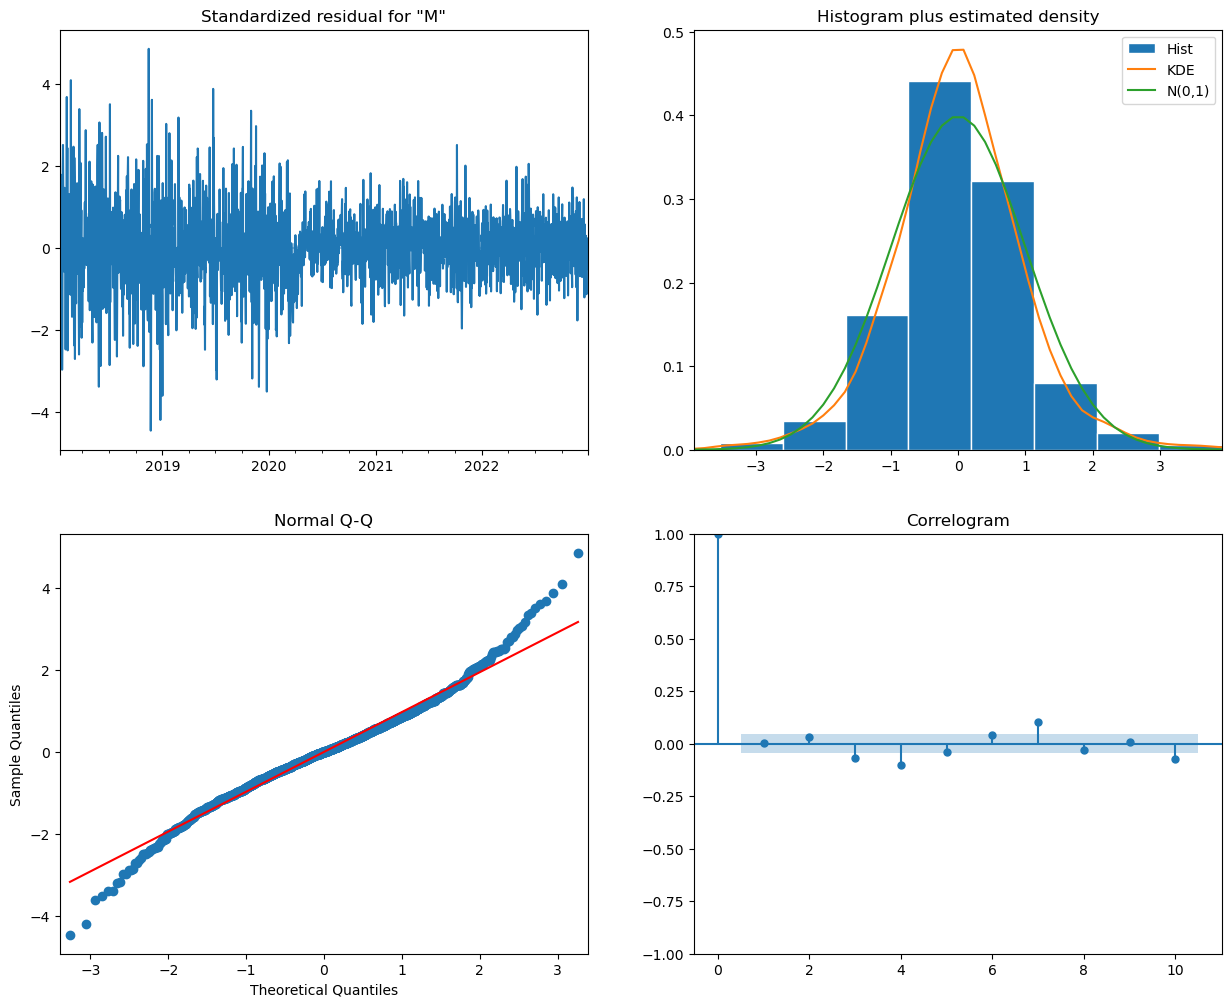

In [45]:
model3.plot_diagnostics(figsize=(15,12));


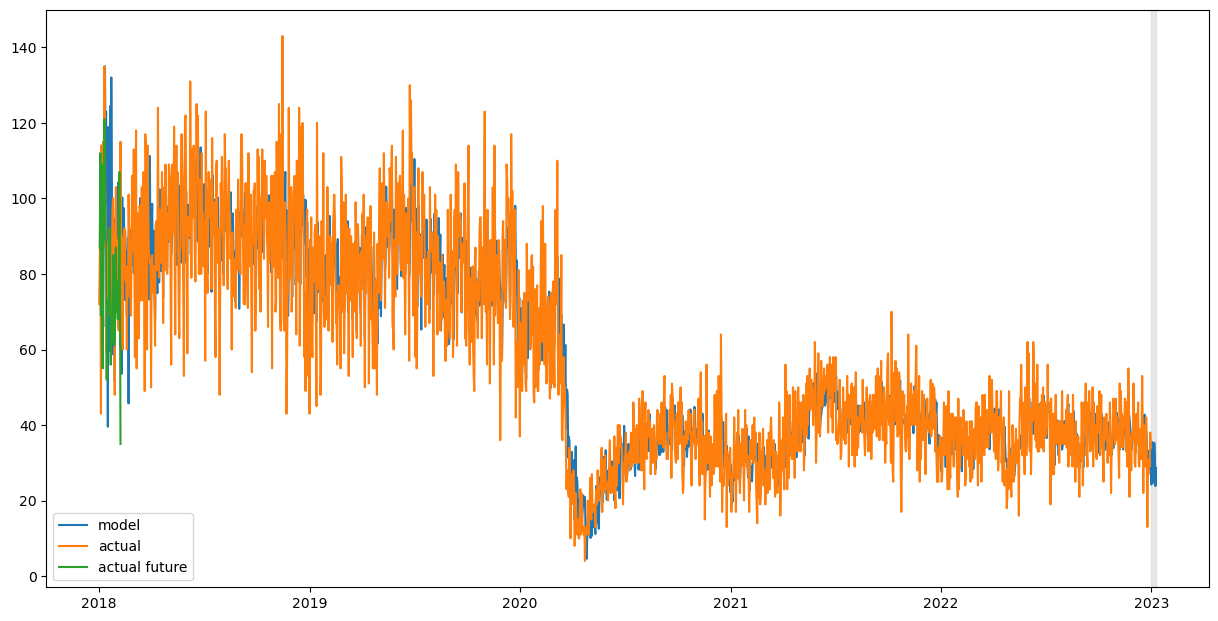

In [46]:
ts_mv['arima_model'] = model3.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = model3.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 8)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [58]:
pred3 = forecast.dropna()
pred3 = pred3[:'2022-01-05']
pred3

2018-01-06    113.988630
2018-01-07     74.998178
2018-01-08     66.005762
2018-01-09    114.998611
2018-01-10    104.988808
                 ...    
2022-01-01     27.908094
2022-01-02     34.318489
2022-01-03     36.512860
2022-01-04     36.195301
2022-01-05     35.151933
Length: 1461, dtype: float64

In [59]:
#
rmse_model3 = np.sqrt(mean_squared_error(train, pred3))

print(f'Third Model RMSE: {rmse_model3}')

Third Model RMSE: 15.022083845960065


In [61]:
print(f'Baseline Model RMSE: {baseline_rmse}')
print(f'First Model RMSE: {rmse_model1}')
print(f'Second Model RMSE: {rmse_model2}')
print(f'Third Model RMSE: {rmse_model3}')

Baseline Model RMSE: 17.031095654070004
First Model RMSE: 13.626561736006161
Second Model RMSE: 15.024331942498504
Third Model RMSE: 15.022083845960065


In [51]:
import pmdarima as pm
model = pm.auto_arima(ts_mv['Moving Violation'], d=1, D=1,
                      m=12, trend='c', seasonal=True, 
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2785.775, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2703.061, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2755.749, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2675.497, Time=0.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2690.722, Time=0.42 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2670.420, Time=0.73 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2697.864, Time=0.26 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2668.822, Time=0.73 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2696.2

In [52]:
model4 = SARIMAX(ts_mv['Moving Violation'], order=(3, 1, 0), seasonal_order=(2, 1, 0, 12)).fit()
model4.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11250D+00    |proj g|=  5.17142D-02

At iterate    5    f=  5.10778D+00    |proj g|=  9.61370D-03


 This problem is unconstrained.



At iterate   10    f=  5.09304D+00    |proj g|=  7.01141D-02

At iterate   15    f=  5.08594D+00    |proj g|=  1.50312D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   1.503D-05   5.086D+00
  F =   5.0859406834070988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Moving Violation   No. Observations:                  261
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1327.431
Date:                            Wed, 12 Apr 2023   AIC                           2666.861
Time:                                    20:31:33   BIC                           2687.942
Sample:                                01-07-2018   HQIC                          2675.347
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3240      0.053     -6.121      0.000      -0.428      -0.220
ar.L2         -0.2101      0.064     -3.287      0.001      -0.335      -0.085
ar.L3         -0.1249      0.064     -1.951      0.051      -0.250       0.001
ar.S.L12      -0.6497      0.059    -10.986      0.000      -0.766      -0.534
ar.S.L24      -0.3457      0.057     -6.066      0.000      -0.457      -0.234
sigma2      2543.8794    173.676     14.647      0.000    2203.480    2884.279
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

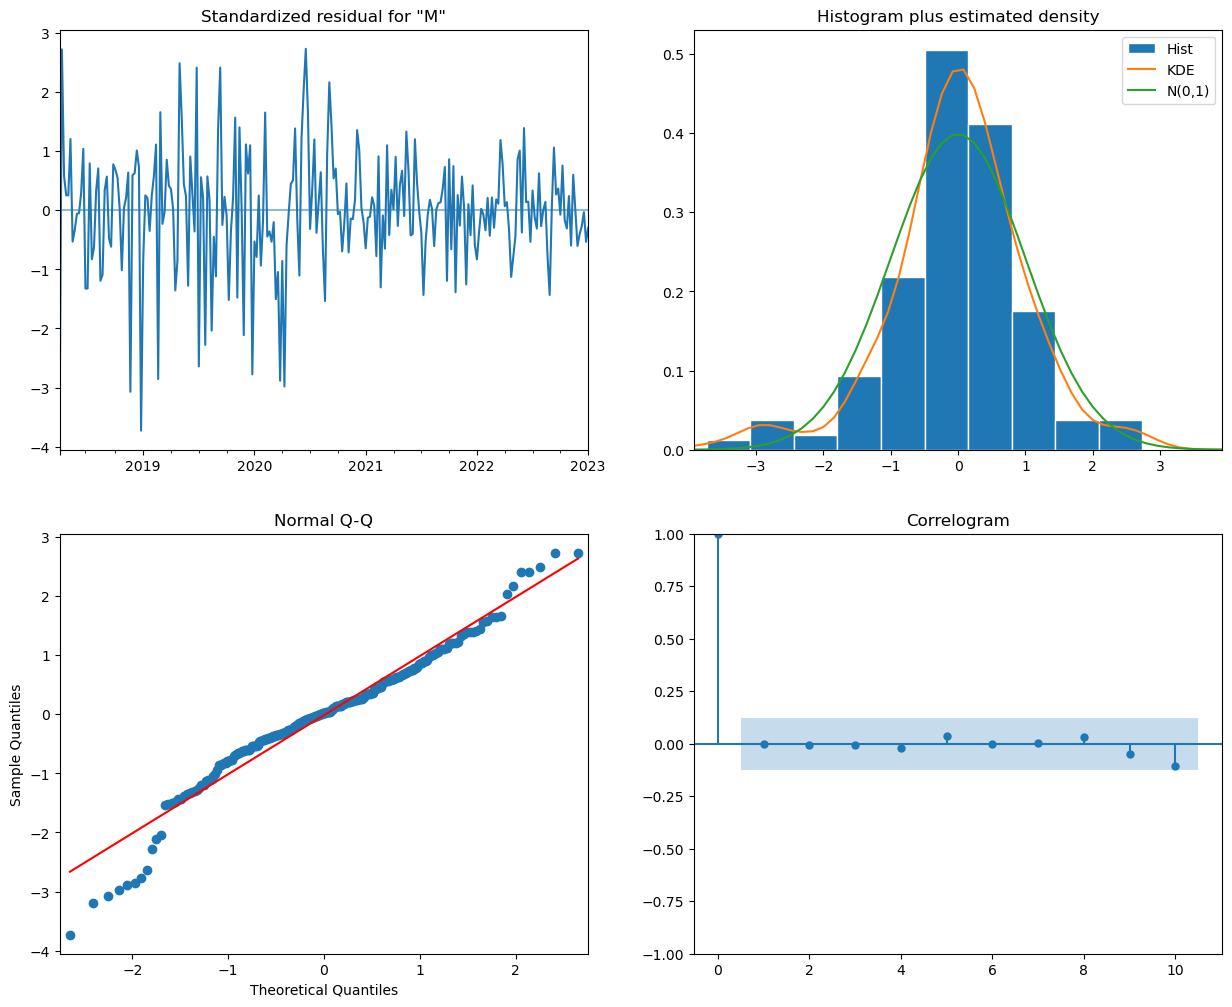

In [53]:
model4.plot_diagnostics(figsize=(15,12));


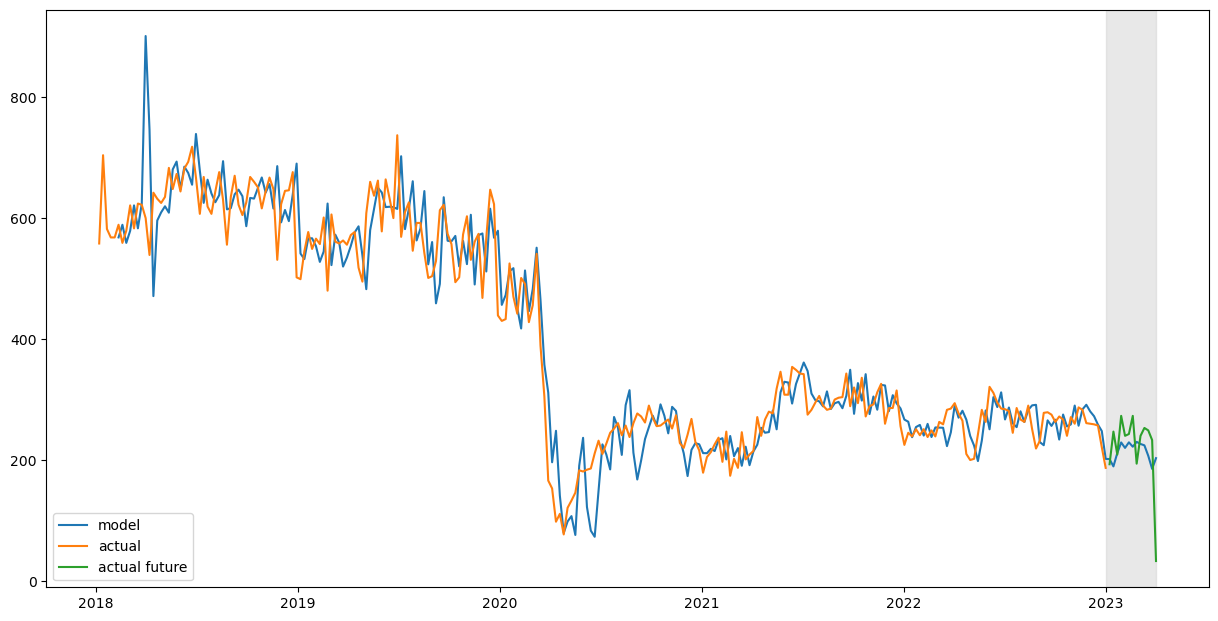

In [54]:
ts_mv['arima_model'] = model4.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = model4.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 12)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [55]:
forecast_object = model4.get_forecast(steps=len(test))
mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = mean.index

NameError: name 'ts2023copy' is not defined

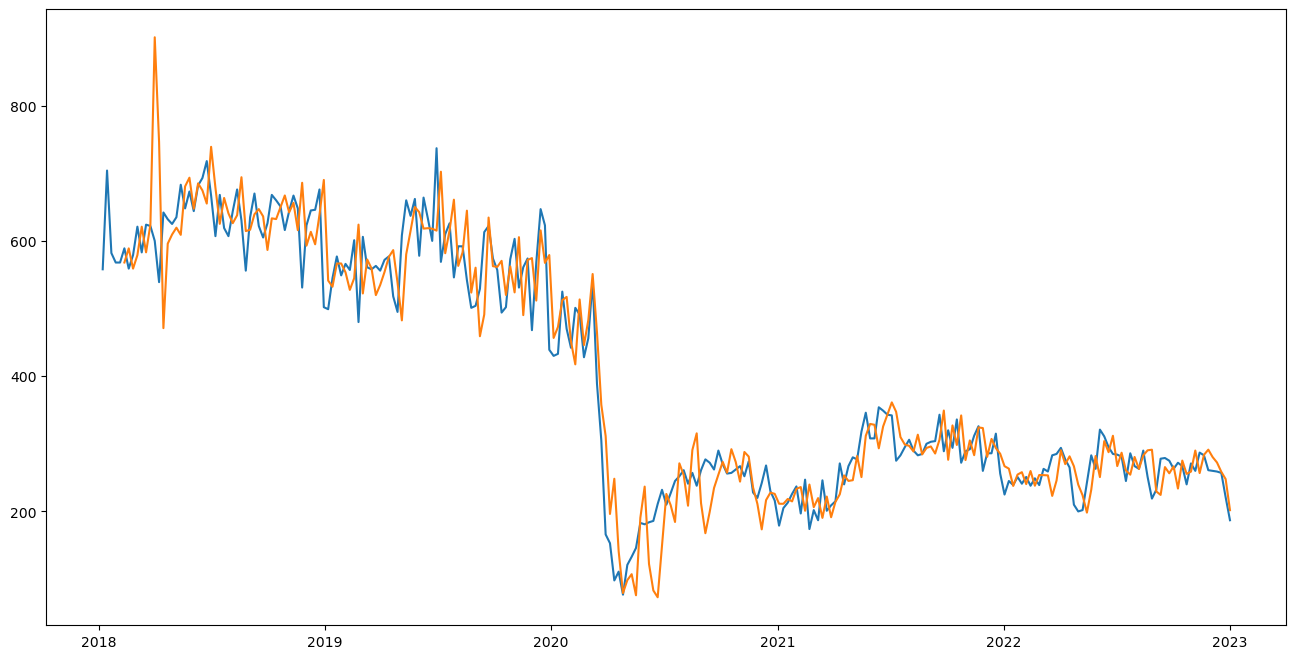

In [56]:

plt.figure(figsize=(16,8))

# Plot past CO2 levels
plt.plot(ts_mv.index, ts_mv, label='real')

# Plot past CO2 levels
plt.plot(ts2023copy.index, ts2023copy, label='real future')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [57]:
start=len(train)
end=len(train)+len(test)-1
pred4 = model4.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(0,1,1,12) Predictions')

In [71]:
# Compare predictions to expected values
for i in range(len(pred4)):
    print(f"predicted={pred4[i]:<11.10}, expected={test['Moving Violation'][i]}")
     

predicted=0.0        , expected=245.0
predicted=557.696689 , expected=239.0
predicted=703.7306039, expected=251.0
predicted=582.0264612, expected=241.0
predicted=568.112923 , expected=251.0
predicted=568.0673371, expected=238.0
predicted=588.9432158, expected=249.0
predicted=559.0113322, expected=239.0
predicted=578.9529748, expected=263.0
predicted=620.9666933, expected=259.0
predicted=583.0934489, expected=283.0
predicted=624.1331156, expected=285.0
predicted=901.0217213, expected=294.0
predicted=746.2598323, expected=277.0
predicted=471.0178513, expected=265.0
predicted=595.9493251, expected=210.0
predicted=609.4219214, expected=200.0
predicted=619.5199926, expected=202.0
predicted=608.9360955, expected=242.0
predicted=680.5289501, expected=283.0
predicted=693.4246047, expected=263.0
predicted=647.540926 , expected=321.0
predicted=685.033835 , expected=311.0
predicted=674.6314331, expected=295.0
predicted=655.1640879, expected=285.0
predicted=739.0785494, expected=284.0
predicted=67

IndexError: index 52 is out of bounds for axis 0 with size 52

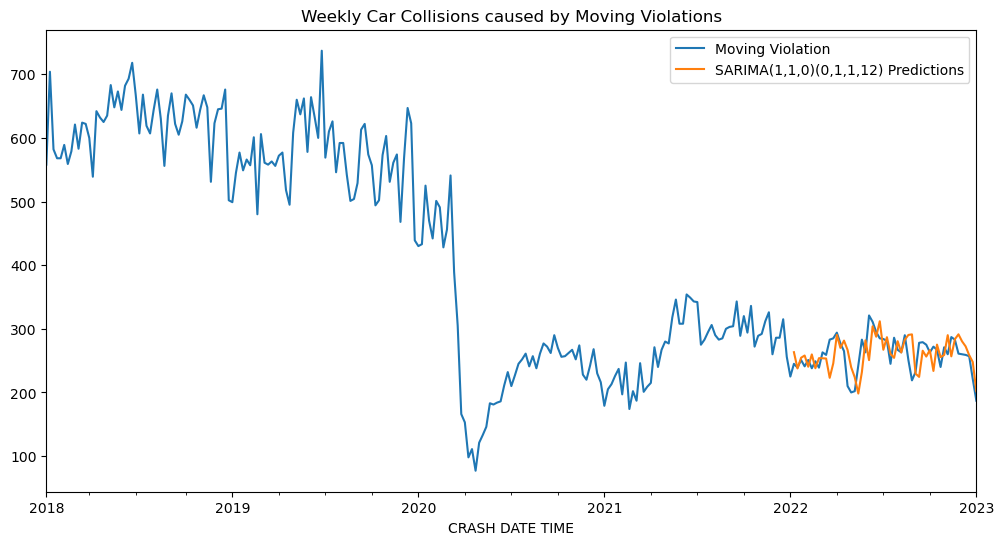

In [59]:
# Plot predictions against known values
title = 'Weekly Car Collisions caused by Moving Violations'
ax = ts_mv['Moving Violation'].plot(legend=True,figsize=(12,6),title=title)
pred4.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Moving Violation'], predictions)}, index=[0])


NameError: name 'predictions' is not defined

In [61]:
r2_score(test['Production'], predictions)


KeyError: 'Production'

In [62]:
pred4= model4.predict()
preddd = pred4['2019':]

In [63]:
#Get th predictions
#pred3 = third_model.predict()
#pred4= model4.predict()
#Calculate the Root Mean Square Error
third_model_rmse = np.sqrt(mean_squared_error(train, preddd))

print(f'Third Model RMSE: {third_model_rmse}')

Third Model RMSE: 189.5157068036583


In [64]:
evaluation_results['mean_squared_error'] = mean_squared_error(test['Moving Violation'], predictions)
model4rmse = np.sqrt(evaluation_results)
print(model4rmse)

NameError: name 'predictions' is not defined

In [65]:
#Calculate the Root Mean Square Error
#model4rmse = np.sqrt(mean_squared_error(train, predictions))

## UPDATED M FOR SARIMA - M =53 WEEKS

In [66]:
from itertools import product

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 52
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [67]:
result_df52 = optimize_SARIMA(parameters_list, 1, 1, 53, ts_mv['Moving Violation'])
result_df52

  0%|          | 0/256 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0    (0, 2, 0, 1)  2235.654485
1    (3, 2, 1, 1)  2236.040474
2    (1, 2, 0, 1)  2236.085596
3    (0, 3, 0, 1)  2236.143653
4    (2, 1, 0, 1)  2236.150143
..            ...          ...
251  (2, 3, 0, 0)  2287.178548
252  (1, 0, 0, 0)  2287.694209
253  (3, 1, 0, 0)  2287.951264
254  (3, 3, 0, 0)  2288.874760
255  (0, 0, 0, 0)  2302.193213

[256 rows x 2 columns]

In [68]:
model5 = SARIMAX(ts_mv['Moving Violation'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 53)).fit()
model5.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36593D+00    |proj g|=  2.86397D-01


 This problem is unconstrained.



At iterate    5    f=  4.29076D+00    |proj g|=  1.37151D-02

At iterate   10    f=  4.28877D+00    |proj g|=  2.59798D-02

At iterate   15    f=  4.26643D+00    |proj g|=  7.67662D-03

At iterate   20    f=  4.26579D+00    |proj g|=  1.92745D-03

At iterate   25    f=  4.26547D+00    |proj g|=  1.75301D-03

At iterate   30    f=  4.26543D+00    |proj g|=  2.15260D-04

At iterate   35    f=  4.26542D+00    |proj g|=  1.64004D-04

At iterate   40    f=  4.26542D+00    |proj g|=  1.22488D-04

At iterate   45    f=  4.26542D+00    |proj g|=  2.60633D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     52   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Moving Violation   No. Observations:                  261
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 53)   Log Likelihood               -1113.275
Date:                            Thu, 13 Apr 2023   AIC                           2236.551
Time:                                    03:14:20   BIC                           2253.214
Sample:                                01-07-2018   HQIC                          2243.289
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3324      0.060     -5.559      0.000      -0.450      -0.215
ma.L2         -0.1223      0.063     -1.932      0.053      -0.246       0.002
ma.S.L53      -0.8977     89.669     -0.010      0.992    -176.645     174.850
ma.S.L106     -0.1012      9.205     -0.011      0.991     -18.142      17.940
sigma2      1901.3509   1.71e+05      0.011      0.991   -3.32e+05    3.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                23.56
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

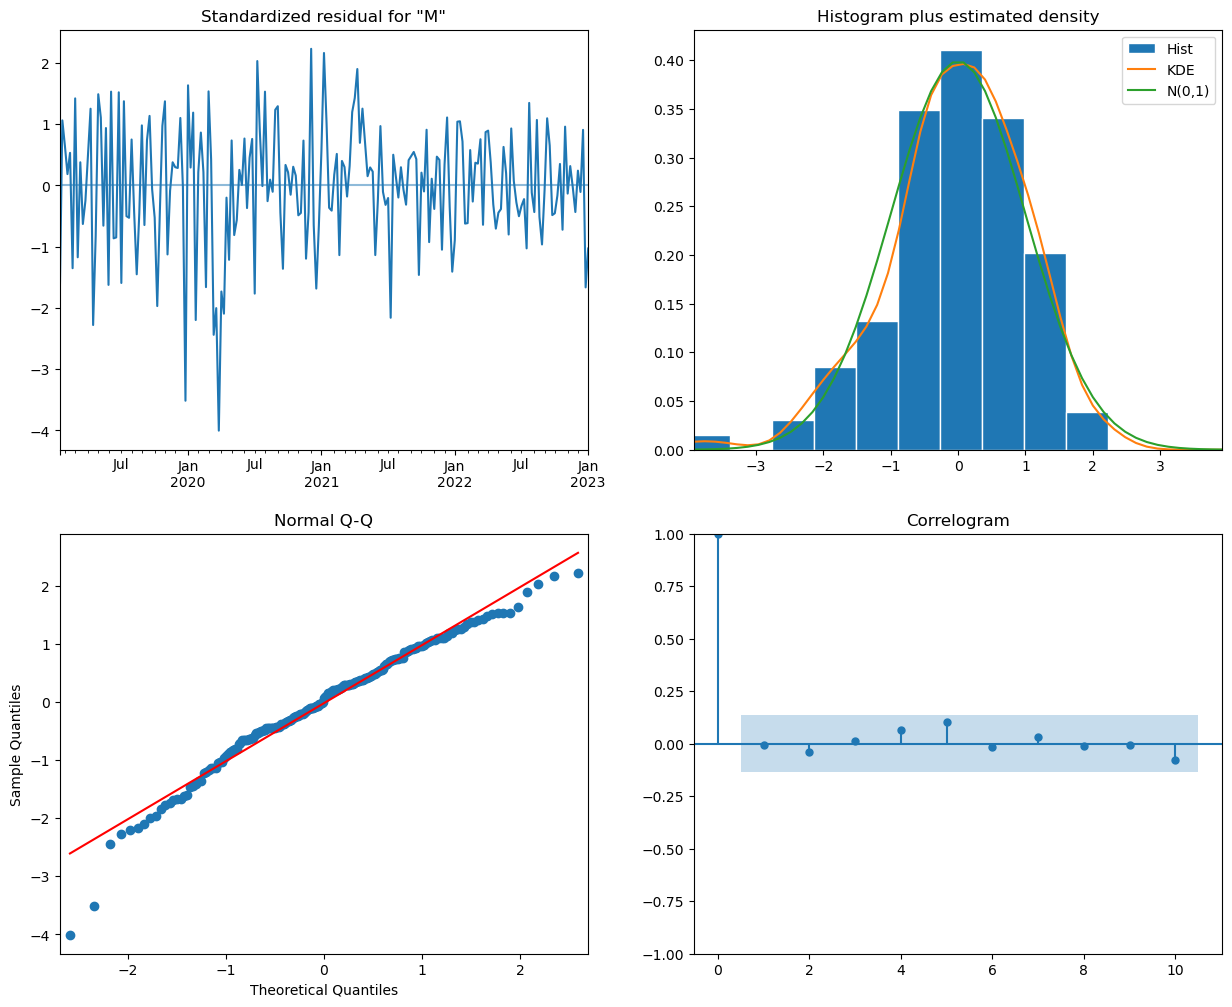

In [69]:
model5.plot_diagnostics(figsize=(15,12));


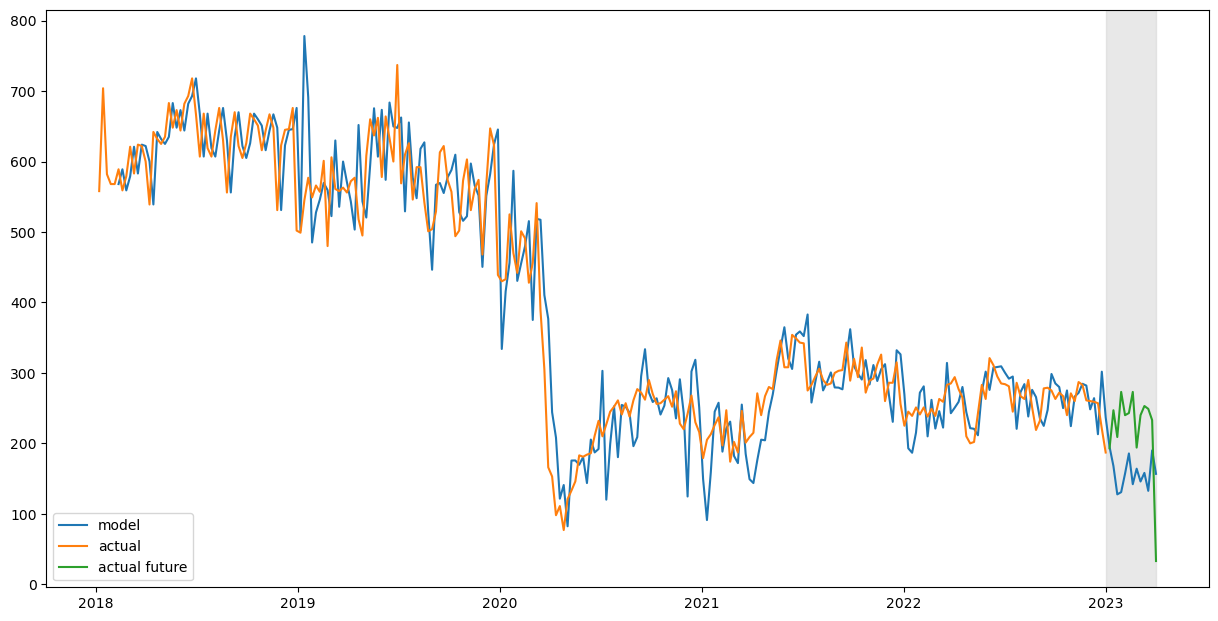

In [70]:
ts_mv['arima_model'] = model5.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = model5.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 12)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [72]:
start=len(train)
end=len(train)+len(test)-1
pred5 = model5.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,2)(0,1,2,53) Predictions')

In [73]:
# Compare predictions to expected values
for i in range(len(pred4)):
    print(f"predicted={pred5[i]:<11.10}, expected={test['Moving Violation'][i]}")
     

predicted=192.9950344, expected=245.0
predicted=186.669608 , expected=239.0
predicted=215.2167643, expected=251.0
predicted=271.9779991, expected=241.0
predicted=280.9225248, expected=251.0
predicted=209.9378008, expected=238.0
predicted=261.7516831, expected=249.0
predicted=220.9882022, expected=239.0
predicted=245.7172386, expected=263.0
predicted=222.3950788, expected=259.0
predicted=314.1587982, expected=283.0
predicted=242.7756836, expected=285.0
predicted=250.5826747, expected=294.0
predicted=258.858037 , expected=277.0
predicted=280.0515619, expected=265.0
predicted=244.1870286, expected=210.0
predicted=221.5682845, expected=200.0
predicted=220.659328 , expected=202.0
predicted=211.4784235, expected=242.0
predicted=273.276162 , expected=283.0
predicted=301.8426428, expected=263.0
predicted=275.8639316, expected=321.0
predicted=307.3843912, expected=311.0
predicted=308.3680098, expected=295.0
predicted=309.361354 , expected=285.0
predicted=300.186734 , expected=284.0
predicted=29

IndexError: index 52 is out of bounds for axis 0 with size 52

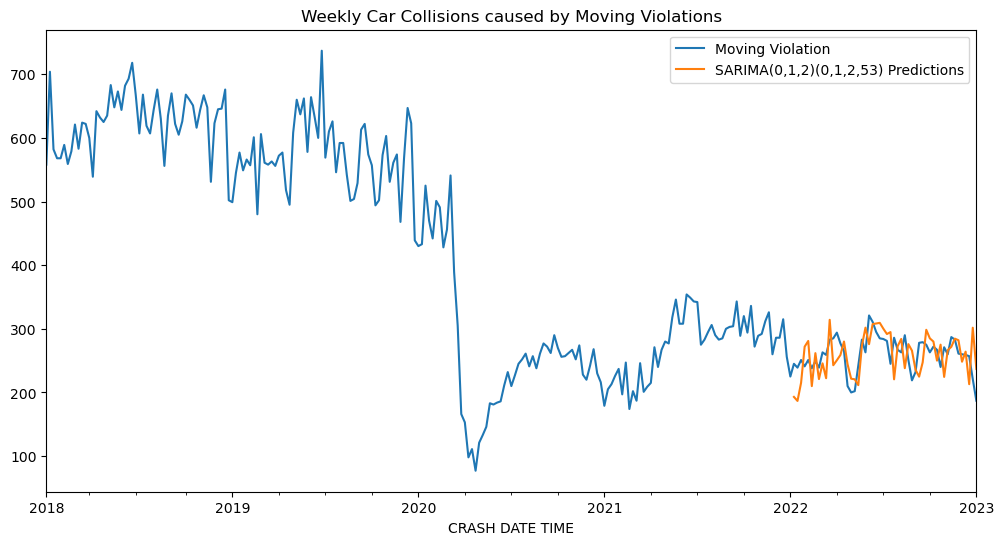

In [75]:
# Plot predictions against known values
title = 'Weekly Car Collisions caused by Moving Violations'
ax = ts_mv['Moving Violation'].plot(legend=True,figsize=(12,6),title=title)
pred5.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);